In [ ]:
# QUESTO FILE ANALIZZA IN MODO PIù GENERALE GLI ORDINI CON VOLUMI ALTI CON TIMEFRAME MAGGIORI UGUALI A 15 MINUTI
# L'ANALISI NON HA PORTATO AD UN RISULTATO SODDISFACENTE


from Functions import total_function_multiprocessing
from Helpers import create_event_keys
from time import sleep
import json

# if True, the analysis starts from the current event-keys used in production
# else, it starts an analysis based on the keys in "event_keys" folder
KEEP_PRODUCTION_ANALYSIS = True

if not KEEP_PRODUCTION_ANALYSIS:
    analysis_name = '2023-2024-analysis-10-250-higherfrequency'
    list_minutes = '1440'
    event_keys_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/event_keys/event_keys.json"
    event_keys = create_event_keys(event_keys_path, list_minutes, analysis_name)
else:
    riskmanagement_json_prod_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/riskmanagement.json"
    with open(riskmanagement_json_prod_path, 'r') as file:
        # Retrieve shared memory for JSON data and "start_interval"
        riskmanagement_json_prod = json.load(file)
        event_keys = list(riskmanagement_json_prod.keys())

n_processes = 8
analysis_timeframe=7

UNLOCK = True
n_iterations = 10

for i in range(n_iterations):
    if UNLOCK:
        shared_data = total_function_multiprocessing(event_keys, analysis_timeframe, n_processes, KEEP_PRODUCTION_ANALYSIS) 
        iterazione = i+1
    msg=f'{iterazione}/{n_iterations} COMPLETED'
    print(msg)

    print('sleeping')
    sleep(5)

In [4]:
#DOWNLOAD AND SHOW OUTPUT FROM TOTAL MULTIPROCESSING

import sys
sys.path.insert(0,'..')
from Functions import download_show_output
from Helpers import filter_complete_info_by_current_eventkeys
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', None)

minimum_event_number = 1
minimum_event_number_list = [minimum_event_number]
mean_threshold = -10
frequency_threshold = 0
std_multiplier = 10
early_validation = False
# file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-sell-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-sell-10-250-highfrequency.json"]

file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/analysis.json"]
start_analysis= datetime(2025,1,1)
early_validation = datetime(2026,1,1)
xth_percentile=100
filter_field='mean' #mean, std, max, min
output, complete_info = download_show_output(minimum_event_number=minimum_event_number,mean_threshold=mean_threshold, frequency_threshold=frequency_threshold,
                                              early_validation=early_validation, std_multiplier=std_multiplier, file_paths=file_paths,
                                                start_analysis=start_analysis, DELETE_99_PERCENTILE=True, filter_field=filter_field, xth_percentile=xth_percentile)


output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)

df = pd.DataFrame(output).transpose()
n_event_keys = len(df['mean'])
print(f'Number of event_keys: {n_event_keys}')
daily_frequency_all_events = int(sum(df['frequency/month']) / 30)
print(f'Daily frequency of events: {daily_frequency_all_events}')

df.sort_values(by=['mean'], ascending=False)

#df.sort_values(by=['lower_bound'], ascending=False)

Filtered 17 event_keys
Number of event_keys: 23
Daily frequency of events: 2


mean   std   max   min  \
buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl:250  1.57  4.45  7.86 -5.37   
buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250    1.18  3.35  6.98 -4.56   
buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150    0.13  4.40  6.64 -7.23   
buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150    0.09  3.57  6.22 -5.99   
buy_vol_15m:0.25/vol_15m:2/timeframe:1440/lvl:10    0.06  1.88  3.31 -4.03   
buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250   0.04  3.54  6.10 -5.69   
buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50    -0.05  3.21  5.28 -5.96   
buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50     -0.30  3.32  4.68 -6.08   
buy_vol_5m:0.25/vol_5m:5/timeframe:1440/lvl:10     -0.44  2.32  3.19 -5.52   
buy_vol_1m:0.15/vol_1m:10/timeframe:1440/lvl:10    -0.46  2.08  2.87 -4.66   
buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250  -0.57  2.78  4.21 -5.40   
buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150  -0.59  3.67  5.31 -6.88   
buy_vol_1m:0.15/vol_1m:20/timeframe:1440/lvl:50    -0.68  3.52  5.37 -7.66   
buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150   -0.99  1.33  2.01 -3.63   
buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50   -1.02  3.30  4.43 -6.80   
buy_vol_1m:0.85/vol_1m:10/timeframe:1440/lvl:10    -1.04  2.50  3.24 -5.54   
buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150    -1.12  2.71  3.72 -5.78   
buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150    -1.17  2.31  2.80 -5.15   
buy_vol_5m:0.8/vol_5m:5/timeframe:1440/lvl:10      -1.75  2.00  1.08 -5.06   
buy_vol_15m:0.8/vol_15m:20/timeframe:1440/lvl:250  -2.12  2.88  3.44 -7.02   
buy_vol_5m:0.8/vol_5m:50/timeframe:1440/lvl:250    -2.76  3.00  3.08 -8.21   
buy_vol_5m:0.8/vol_5m:10/timeframe:1440/lvl:50     -2.78  3.80  3.48 -9.20   
buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50    -3.18  3.56  1.23 -8.14   

                                                    median_max  median_min  \
buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl:250        3.48       -2.18   
buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250          3.72       -1.91   
buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150          3.56       -4.15   
buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150          3.58       -3.69   
buy_vol_15m:0.25/vol_15m:2/timeframe:1440/lvl:10          2.71       -2.28   
buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250         3.61       -3.23   
buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50           4.06       -3.80   
buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50            3.23       -4.40   
buy_vol_5m:0.25/vol_5m:5/timeframe:1440/lvl:10            3.18       -3.03   
buy_vol_1m:0.15/vol_1m:10/timeframe:1440/lvl:10           2.82       -2.68   
buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250         2.46       -3.84   
buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150         3.28       -4.33   
buy_vol_1m:0.15/vol_1m:20/timeframe:1440/lvl:50           3.40       -5.00   
buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150          2.07       -2.44   
buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50          2.96       -4.83   
buy_vol_1m:0.85/vol_1m:10/timeframe:1440/lvl:10           1.70       -3.88   
buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150           2.57       -2.82   
buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150           2.53       -3.27   
buy_vol_5m:0.8/vol_5m:5/timeframe:1440/lvl:10             0.92       -3.48   
buy_vol_15m:0.8/vol_15m:20/timeframe:1440/lvl:250         1.89       -6.06   
buy_vol_5m:0.8/vol_5m:50/timeframe:1440/lvl:250           1.49       -6.68   
buy_vol_5m:0.8/vol_5m:10/timeframe:1440/lvl:50            2.01       -6.62   
buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50           0.80       -4.49   

                                                    standings  n_coins  \
buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl:250     187.41     25.0   
buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250       188.45     21.0   
buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150       101.74     50.0   
buy_vol_1m

In [4]:
len(complete_info.keys())

23

In [ ]:
# from Helpers import filter_complete_info_by_current_eventkeys
# output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)


In [1]:
from Helpers import create_strategy_configuration
strategy_configuration_parameters =  {
        'strategy_jump': 0.04,
        'limit': 0.25,
        'price_change_jump': 0.025,
        'max_limit': 0.2,
        'price_drop_limit': 0.05,
        'distance_jump_to_current_price': 0.01,
        'max_ask_order_distribution_level': 0.1,
        'last_i_ask_order_distribution': 1,
        'min_n_obs_jump_level': 5
    }
create_strategy_configuration(strategy_configuration_parameters)

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Filtered 0 event_keys
Number of event_keys: 23
Daily frequency of events: 1


In [ ]:
from Helpers import frequency_events_analysis
frequency_events_analysis(complete_info)


There are 0 event_keys that are in the riskmanagement configuration
There are 0 event_keys that have been discarded in the riskmanagement configuration


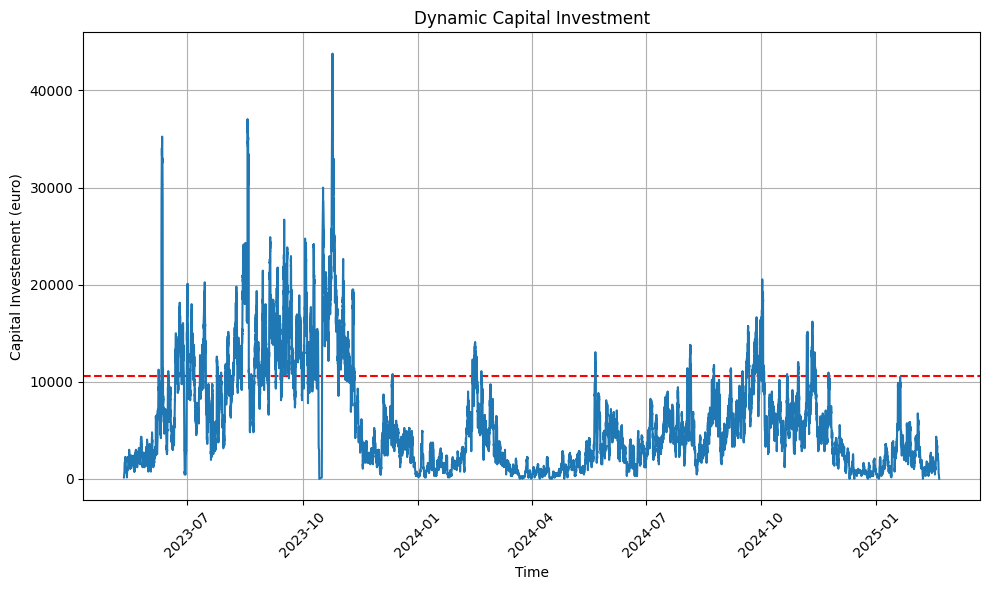

In [7]:
from Analysis2023.Functions import check_investment_amount
check_investment_amount(complete_info, output, investment_amount=150)

In [2]:
from Helpers import get_timeseries
from Helpers import get_analysis


output, complete_info = get_analysis()
event_keys_filter = []
check_past=180 #minutes before event trigger
check_future=180 #minutes after the end of event (usually after 1 days from event trigger)
jump=0.04 #jump from price levels in terms of cumulative volume order (from 0 to 1)
limit=0.25 #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
price_change_jump = 0.025 #range of price change (used in get_price_levels for bid/ask_order_distribution)
max_limit = 0.2 #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
price_drop_limit = 0.05  #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
distance_jump_to_current_price = 0.01 # minimum distance from jump
max_ask_order_distribution_level = 0.2 # max percentage of ask volume at the first level (level is based on price_change_jump)
last_i_ask_order_distribution= 1 # how many last order distribution obs I consider, an np.mean is executed
min_n_obs_jump_level=5
save_plot=False
analyze=True
#event_keys_filter = ['buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50', 'buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150']
get_timeseries(complete_info, check_past=check_past, check_future=check_future, jump=jump, limit=limit, event_keys_filter = event_keys_filter,
                   price_change_jump = price_change_jump, max_limit = max_limit, price_drop_limit = price_drop_limit,
                     distance_jump_to_current_price = distance_jump_to_current_price, max_ask_order_distribution_level = max_ask_order_distribution_level,
                       last_i_ask_order_distribution= last_i_ask_order_distribution, min_n_obs_jump_level=min_n_obs_jump_level, save_plot=save_plot, analyze=analyze)


Filtered 0 event_keys
Number of event_keys: 23
Daily frequency of events: 2



#####################################################################
1/23 Event Key: buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#####################################################################
2/23 Event Key: buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#####################################################################
3/23 Event Key: buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#############################

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, cur

Event Key: buy_vol_5m:0.8/vol_5m:10/timeframe:1440/lvl:50
Event Key: buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250
Event Key: buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150
Event Key: buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250
Event Key: buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150
Event Key: buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150
Event Key: buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50
Event Key: buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150
Event Key: buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50
Event Key: buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50
Event Key: buy_vol_1m:0.15/vol_1m:10/timeframe:1440/lvl:10
Event Key: buy_vol_5m:0.8/vol_5m:50/timeframe:1440/lvl:250
Event Key: buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250
Event Key: buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150
Event Key: buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50
Event Key: buy_vol_15m:0.8/vol_15m:20/timeframe:1440/lvl:250
Event Key: buy_vol_15m:0.25/vol_15m:2/timefram

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



##################### STRATEGY INFO #####################
strategy_jump: 0.04 
limit: 0.25 
price_change_jump: 0.025 
max_limit: 0.2 
price_drop_limit: 0.05 
distance_jump_to_current_price: 0.01 
max_ask_order_distribution_level: 0.2 
last_i_ask_order_distribution: 1 
min_n_obs_jump_level: 5 
##################### STRATEGY INFO #####################



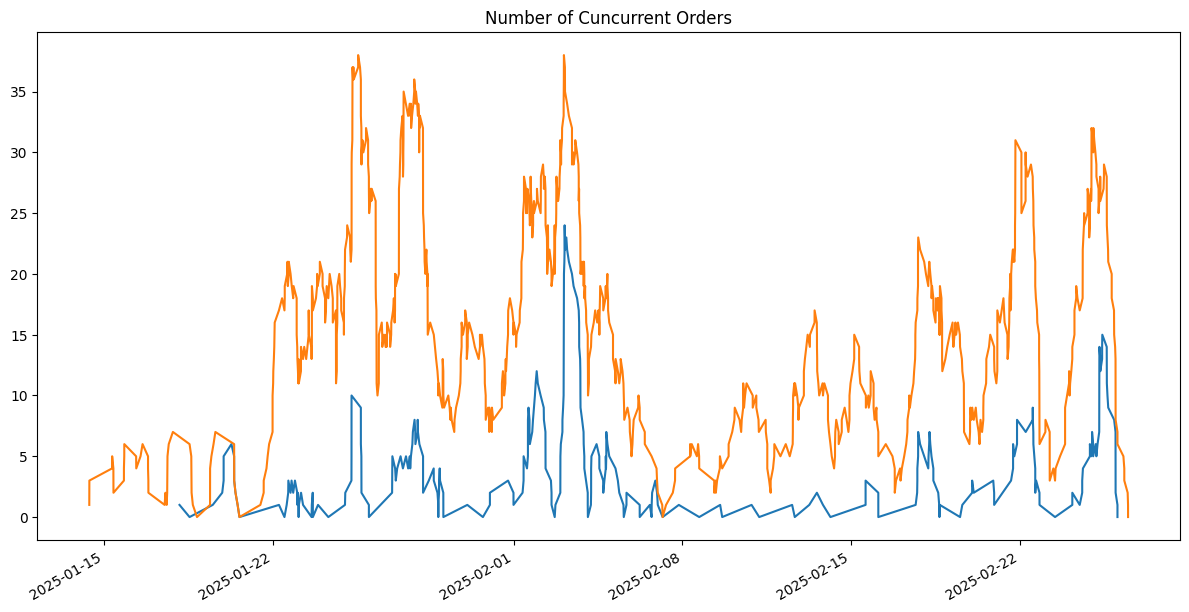

svolume standings is up to date, loading then..
Last date saved: 2025-02-26
1 day, 7:38:40.616526
Data is up to date


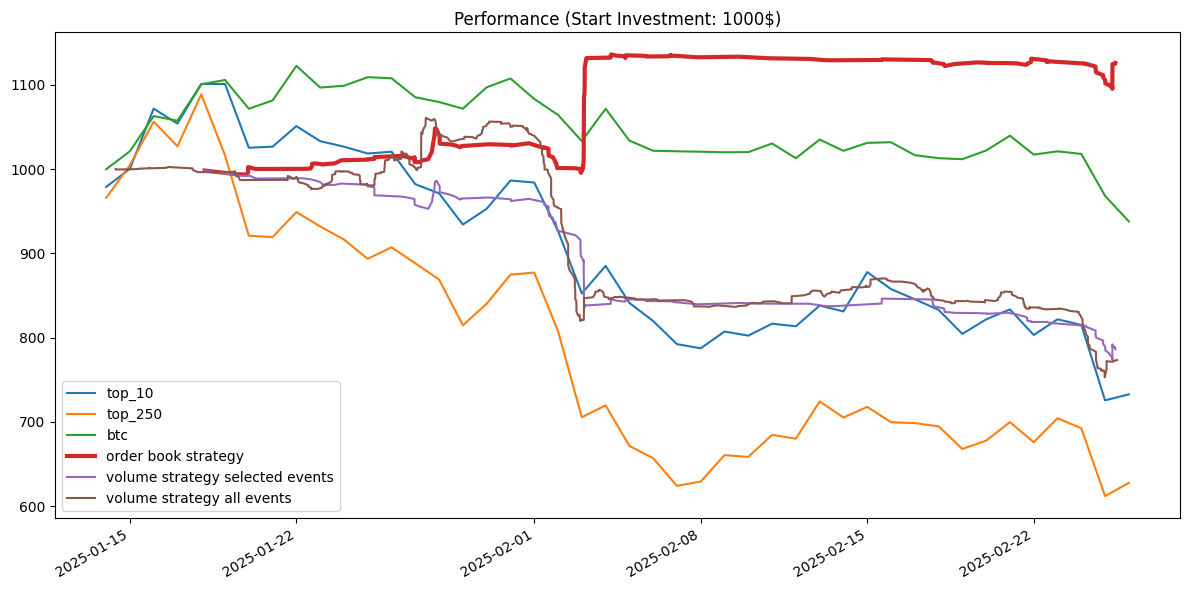

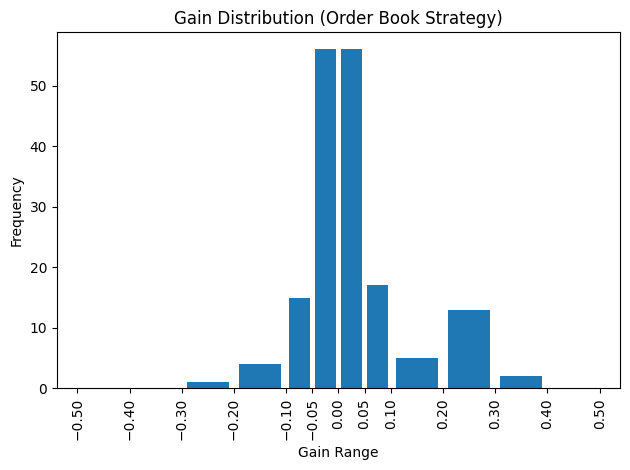

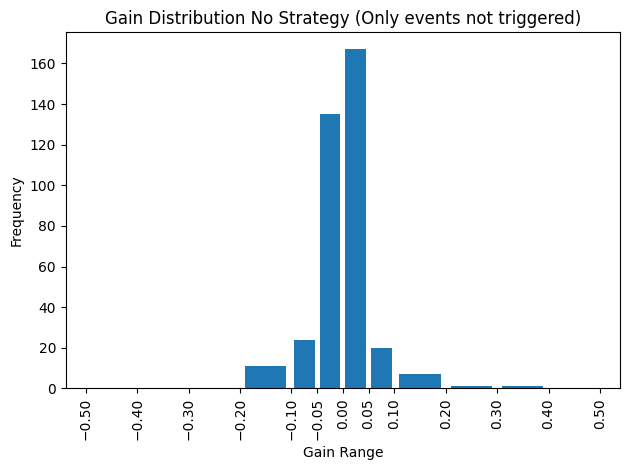

Initial Investment: 1000$
Invesment per event: 41.67$
Commission: 10.03$
Total Investment 7041.67
Average Profit per event: 1.93%
Profit: 126.13$
Total Observations Under Analysis: 535
Total Events triggered by strategy: 169
535


event_keys  n_events  gain    max  \
14   buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150         3  8.65  12.53   
2    buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150         1  6.98   4.07   
15   buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150        10  6.10  11.32   
3      buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50         8  5.95   4.59   
10  buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl...         5  5.17   5.55   
21    buy_vol_1m:0.15/vol_1m:20/timeframe:1440/lvl:50        23  3.88   6.56   
8     buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150         4  3.77   4.13   
18   buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50        20  3.52   4.34   
20  buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150        13  3.22   5.44   
11  buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250         8  3.06   8.36   
12  buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250         8  2.12   2.23   
4   buy_vol_15m:0.8/vol_15m:20/timeframe:1440/lvl:250         4  1.39   0.49   
0    buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250         7 -0.39   1.78   
17    buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50        11 -0.53   6.12   
16    buy_vol_1m:0.85/vol_1m:10/timeframe:1440/lvl:10         7 -0.60   2.96   
1     buy_vol_5m:0.8/vol_5m:50/timeframe:1440/lvl:250         5 -0.64   1.28   
7     buy_vol_1m:0.15/vol_1m:10/timeframe:1440/lvl:10         8 -1.17   3.28   
22     buy_vol_5m:0.25/vol_5m:5/timeframe:1440/lvl:10         5 -2.24   0.95   
9     buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150         4 -2.39   2.17   
6     buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50         5 -3.28   0.99   
13   buy_vol_15m:0.25/vol_15m:2/timeframe:1440/lvl:10         3 -3.60   1.66   
19      buy_vol_5m:0.8/vol_5m:5/timeframe:1440/lvl:10         3 -4.26   0.96   
5      buy_vol_5m:0.8/vol_5m:10/timeframe:1440/lvl:50         4 -4.58   1.56   

      min                                       2025-01  \
14  -6.10     8.65 vs 4.46 / max:12.53 / min:-6.1 / n:3   
2   -4.75     6.98 vs 0.74 / max:4.07 / min:-4.75 / n:1   
15 -13.60    8.17 vs 5.82 / max:11.94 / min:-3.01 / n:3   
3   -9.06     0.97 vs -2.07 / max:3.1 / min:-7.74 / n:4   
10  -7.17    -0.28 vs -1.6 / max:2.59 / min:-4.58 / n:2   
21 -11.33   -0.31 vs -0.06 / max:7.77 / min:-6.63 / n:5   
8   -8.34    2.59 vs -1.18 / max:4.27 / min:-6.95 / n:3   
18  -9.70      4.1 vs 0.03 / max:5.24 / min:-6.15 / n:8   
20  -9.30      7.9 vs 4.11 / max:9.53 / min:-3.88 / n:4   
11 -11.26  -0.38 vs -5.89 / max:8.55 / min:-14.47 / n:2   
12  -5.09     7.17 vs 3.17 / max:6.54 / min:-2.39 / n:1   
4   -7.09                                          None   
0  -11.35    1.27 vs -4.04 / max:0.76 / min:-8.12 / n:3   
17  -9.19    0.94 vs -3.13 / max:0.27 / min:-5.71 / n:1   
16 -11.34    -2.6 vs -4.75 / max:1.26 / min:-8.89 / n:2   
1   -8.35                                          None   
7  -11.27     5.33 vs 3.23 / max:7.78 / min:-4.25 / n:1   
22 -13.95                                          None   
9  -14.57   -2.39 vs -6.7 / max:2.17 / min:-14.57 / n:4   
6  -16.88    -6.1 vs -7.2 / max:0.55 / min:-11.76 / n:3   
13  -8.60  -8.88 vs -6.59 / max:2.71 / min:-11.37 / n:1   
19 -12.72   -2.33 vs -5.65 / max:1.06 / min:-9.54 / n:2   
5   -9.59   -4.58 vs -5.39 / max:1.56 / min:-9.59 / n:4   

                                          2025-02  
14                                           None  
2                                            None  
15   5.21 vs -4.62 / max:11.06 / min:-18.14 / n:7  
3    10.94 vs -0.35 / max:6.08 / min:-10.37 / n:4  
10       8.79 vs 0.01 / max:7.53 / min:-8.9 / n:3  
21   5.04 vs -2.33 / max:6.23 / min:-12.63 / n:18  
8     7.32 vs -1.91 / max:3.71 / min:-12.52 / n:1  
18   3.14 vs -4.24 / max:3.73 / min:-12.06 / n:12  
20    1.14 vs -4.47 / max:3.63 / min:-11.71 / n:9  
11      4.21 vs 0.02 / max:8.3 / min:-10.19 / n:6  
12      1.4 vs -2.23 / max:1.62 / min:-5.48 / n:7  
4       1.39 vs -3.5 / max:0.49 / min:-7.09 / n:4  
0    -1.64 vs -6.02 / max:2.5

In [1]:
from Helpers import plot_strategy_result
df_events_overview, df_event_keys_overview = plot_strategy_result()

df_event_keys_overview.sort_values(by=['gain'], ascending=False)

In [2]:
df_events_overview

Timestamp Buy       Timestamp Sell       Coin  Profit   Investment  \
0    2025-01-18T03:22:00  2025-01-18T13:23:00    LTCUSDT   -3.66   998.415625   
1    2025-01-19T12:28:00  2025-01-20T11:08:00    JUPUSDT  -10.72   993.889583   
2    2025-01-19T21:55:00  2025-01-20T13:15:00    ONEUSDT   -0.09   993.792708   
3    2025-01-19T23:19:00  2025-01-20T09:50:00   WBTCUSDT    6.98   996.641667   
4    2025-01-19T23:19:00  2025-01-20T09:47:00   WBTCUSDT    7.03   999.511458   
5    2025-01-19T23:19:00  2025-01-20T09:47:00   WBTCUSDT    7.30  1002.493750   
6    2025-01-20T07:05:00  2025-01-20T15:05:00   SAGAUSDT   -5.16  1000.284375   
7    2025-01-22T06:26:00  2025-01-22T11:54:00   AAVEUSDT    0.49  1000.429167   
8    2025-01-22T14:06:00  2025-01-22T17:59:00    UNIUSDT    0.80  1000.703125   
9    2025-01-22T15:38:00  2025-01-23T00:37:00     OMUSDT    6.79  1003.472917   
10   2025-01-22T15:46:00  2025-01-23T00:47:00     OMUSDT    7.29  1006.451042   
11   2025-01-22T18:58:00  2025-01-22T20:36:00    FILUSDT    1.03  1006.820833   
12   2025-01-22T22:20:00  2025-01-23T02:00:00    FILUSDT   -0.68  1006.478125   
13   2025-01-23T01:00:00  2025-01-23T01:45:00   AAVEUSDT   -1.12  1005.952083   
14   2025-01-23T02:15:00  2025-01-23T14:55:00    LDOUSDT   -0.99  1005.480208   
15   2025-01-23T04:25:00  2025-01-23T06:24:00   HBARUSDT    1.19  1005.916667   
16   2025-01-23T15:08:00  2025-01-23T16:11:00   BONKUSDT    2.61  1006.944792   
17   2025-01-23T16:03:00  2025-01-23T16:11:00   BONKUSDT    1.85  1007.656250   
18   2025-01-23T21:19:00  2025-01-24T07:35:00  BNSOLUSDT    7.17  1010.584375   
19   2025-01-25T00:10:00  2025-01-25T23:59:00      GUSDT    2.00  1011.358333   
20   2025-01-25T00:28:00  2025-01-25T23:58:00      GUSDT    1.49  1011.919792   
21   2025-01-25T06:36:00  2025-01-25T15:59:00   NEARUSDT    0.83  1012.206250   
22   2025-01-25T06:40:00  2025-01-25T15:59:00   NEARUSDT    0.94  1012.538542   
23   2025-01-25T06:40:00  2025-01-25T15:59:00   NEARUSDT    0.98  1012.887500   
24   2025-01-25T06:40:00  2025-01-25T16:00:00   NEARUSDT    0.88  1013.194792   
25   2025-01-25T06:40:00  2025-01-25T16:30:00   NEARUSDT    0.94  1013.527083   
26   2025-01-25T06:40:00  2025-01-25T16:30:00   NEARUSDT    0.94  1013.859375   
27   2025-01-25T06:40:00  2025-01-25T16:35:00   NEARUSDT    0.75  1014.112500   
28   2025-01-25T06:42:00  2025-01-25T16:35:00   NEARUSDT    0.75  1014.365625   
29   2025-01-26T11:31:00  2025-01-27T02:07:00     OMUSDT    3.67  1015.835417   
30   2025-01-26T23:06:00  2025-01-27T02:46:00   PEPEUSDT   -8.88  1012.076042   
31   2025-01-26T23:08:00  2025-01-27T15:04:00    TAOUSDT    5.57  1014.337500   
32   2025-01-26T23:16:00  2025-01-27T17:08:00    SOLUSDT   -6.12  1011.728125   
33   2025-01-26T23:22:00  2025-01-27T09:52:00    UNIUSDT   -7.49  1008.547917   
34   2025-01-27T04:10:00  2025-01-28T00:50:00    UNIUSDT   -0.15  1008.426042   
35   2025-01-27T07:32:00  2025-01-27T22:18:00    BNBUSDT    5.26  1010.558333   
36   2025-01-27T12:56:00  2025-01-27T22:11:00   SHIBUSDT    2.94  1011.723958   
37   2025-01-27T16:43:00  2025-01-28T05:56:00    JUPUSDT   22.10  1020.872917   
38   2025-01-27T17:51:00  2025-01-28T05:56:00    JUPUSDT   22.29  1030.101042   
39   2025-01-27T19:17:00  2025-01-28T05:56:00    JUPUSDT   22.44  1039.391667   
40   2025-01-27T19:47:00  2025-01-28T05:56:00    JUPUSDT   21.72  1048.382292   
41   2025-01-27T21:28:00  2025-01-28T02:17:00    TAOUSDT   -2.71  1047.193750   
42   2025-01-28T00:35:00  2025-01-28T21:07:00  PENGUUSDT  -20.08  1038.767708   
43   2025-01-28T00:35:00  2025-01-28T21:07:00  PENGUUSDT  -19.99  1030.379167   
44   2025-01-28T11:38:00  2025-01-28T16:37:00    ACHUSDT   -2.25  1029.382292   
45   2025-01-28T16:32:00  2025-01-28T20:16:00    CFXUSDT   -2.55  1028.260417   
46   2025-01-28T21:08:00  2025-01-28T22:51:00   PEPEUSDT   -4.94  1026.142708   
47   2025-01-28T21:51:00  2025-01-29T02:09:00     OMUSDT    1.15  1026.562500   
48   2025-01-28T21:51:00  2025-01-29T02:08


##################### STRATEGY INFO #####################
strategy_jump: 0.04 
limit: 0.25 
price_change_jump: 0.025 
max_limit: 0.2 
price_drop_limit: 0.05 
distance_jump_to_current_price: 0.01 
max_ask_order_distribution_level: 0.1 
last_i_ask_order_distribution: 1 
min_n_obs_jump_level: 5 
##################### STRATEGY INFO #####################

RAYUSDT 2025-02-02T21:46:04.969803 37.11 buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50
Initial Price: 5.573 - drop_from_max: -28.22%
buy: 2025-02-03T01:56:00 - 4.621. sell: 2025-02-03T21:46:00 - 6.336
[{'ask': {'0.025': 0.0, '0.05': 0.0, '0.075': 0.0, '0.1': 1.0, '0.125': 0.0, '0.15': 0.0, '0.175': 0.0, '0.2': 0.0, '0.225': 0.0, '0.25': 0.0}, 'bid_level': 0.67, 'ask_level': 0.01, 'total_bid_volume': 888422, 'total_ask_volume': 20416883, 'dt': '2025-02-03T01:56'}]


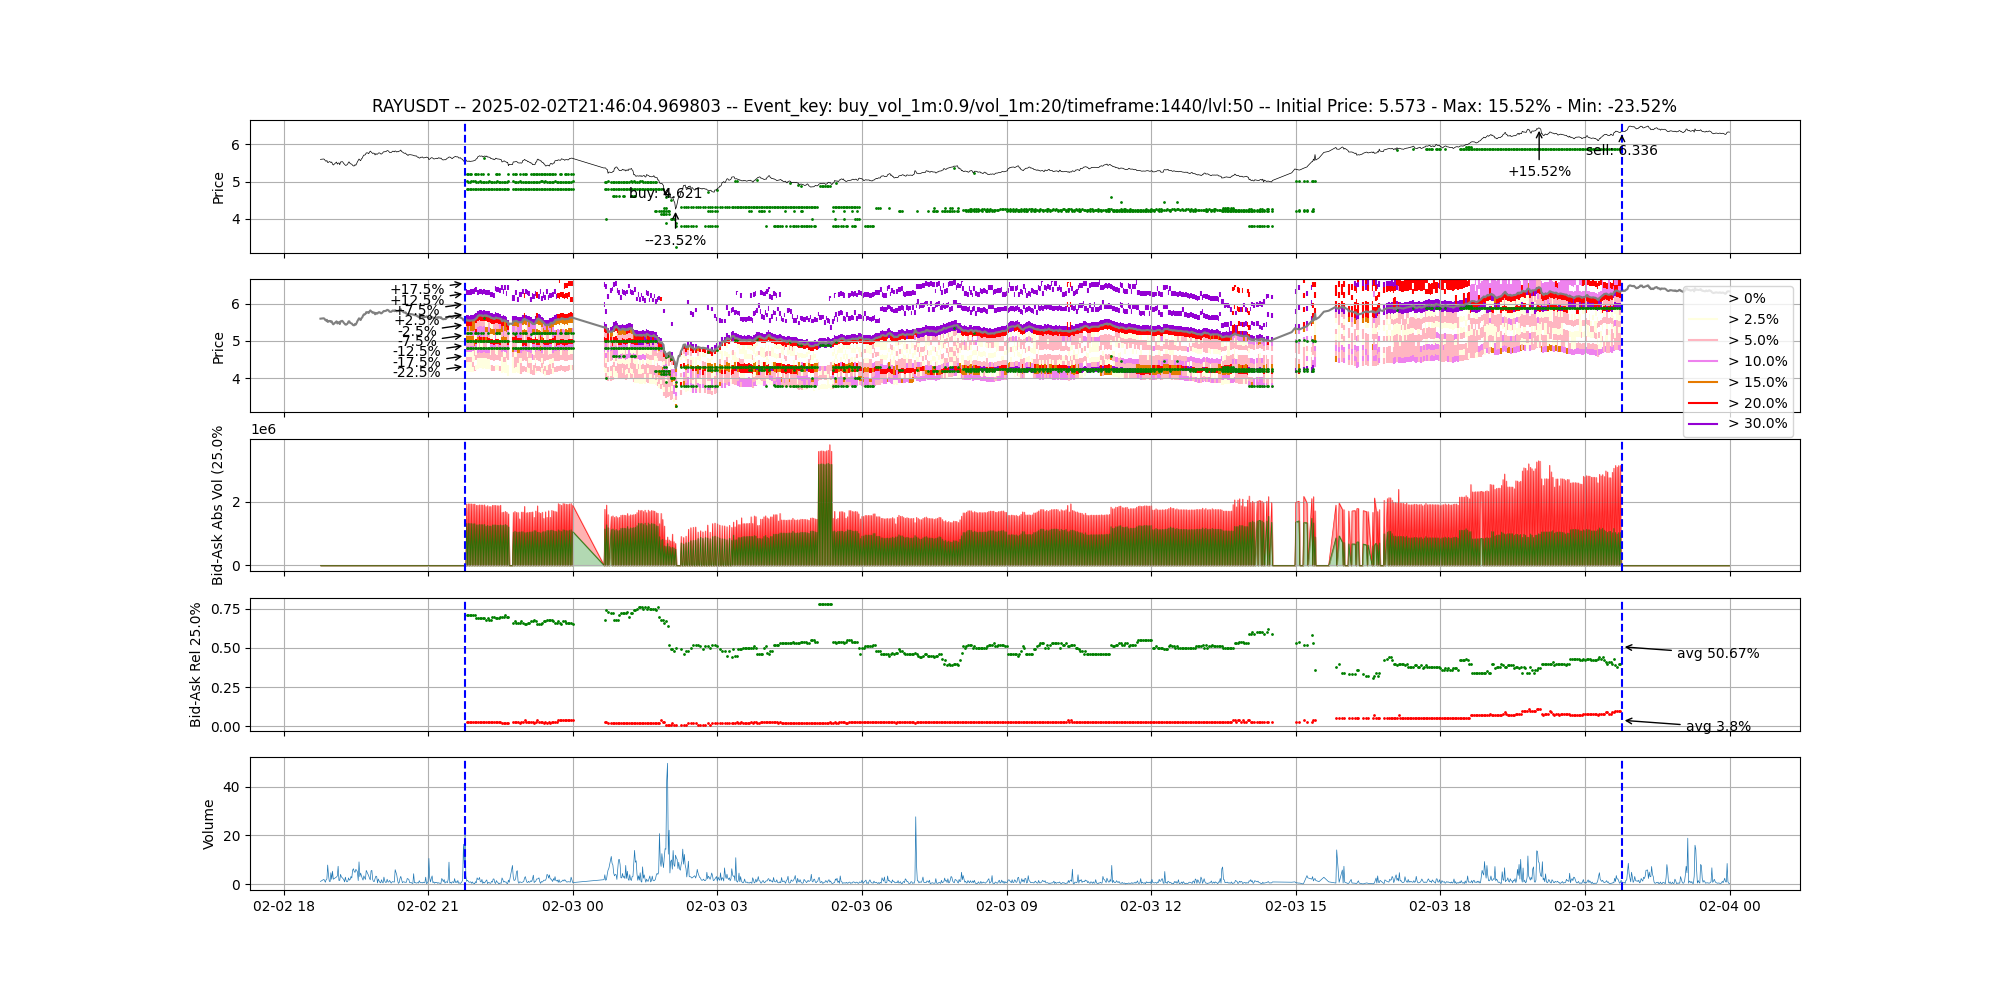

APTUSDT 2025-02-02T07:11:03.348891 14.43 buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50
Initial Price: 7.09 - drop_from_max: -29.72%
buy: 2025-02-03T01:56:00 - 4.99. sell: 2025-02-03T07:11:00 - 5.71
[{'ask': {'0.025': 0.0, '0.05': 0.0, '0.075': 1.0, '0.1': 0.0, '0.125': 0.0, '0.15': 0.0, '0.175': 0.0, '0.2': 0.0, '0.225': 0.0, '0.25': 0.0}, 'bid_level': 0.89, 'ask_level': 0.01, 'total_bid_volume': 645208, 'total_ask_volume': 36555991, 'dt': '2025-02-03T01:56'}]


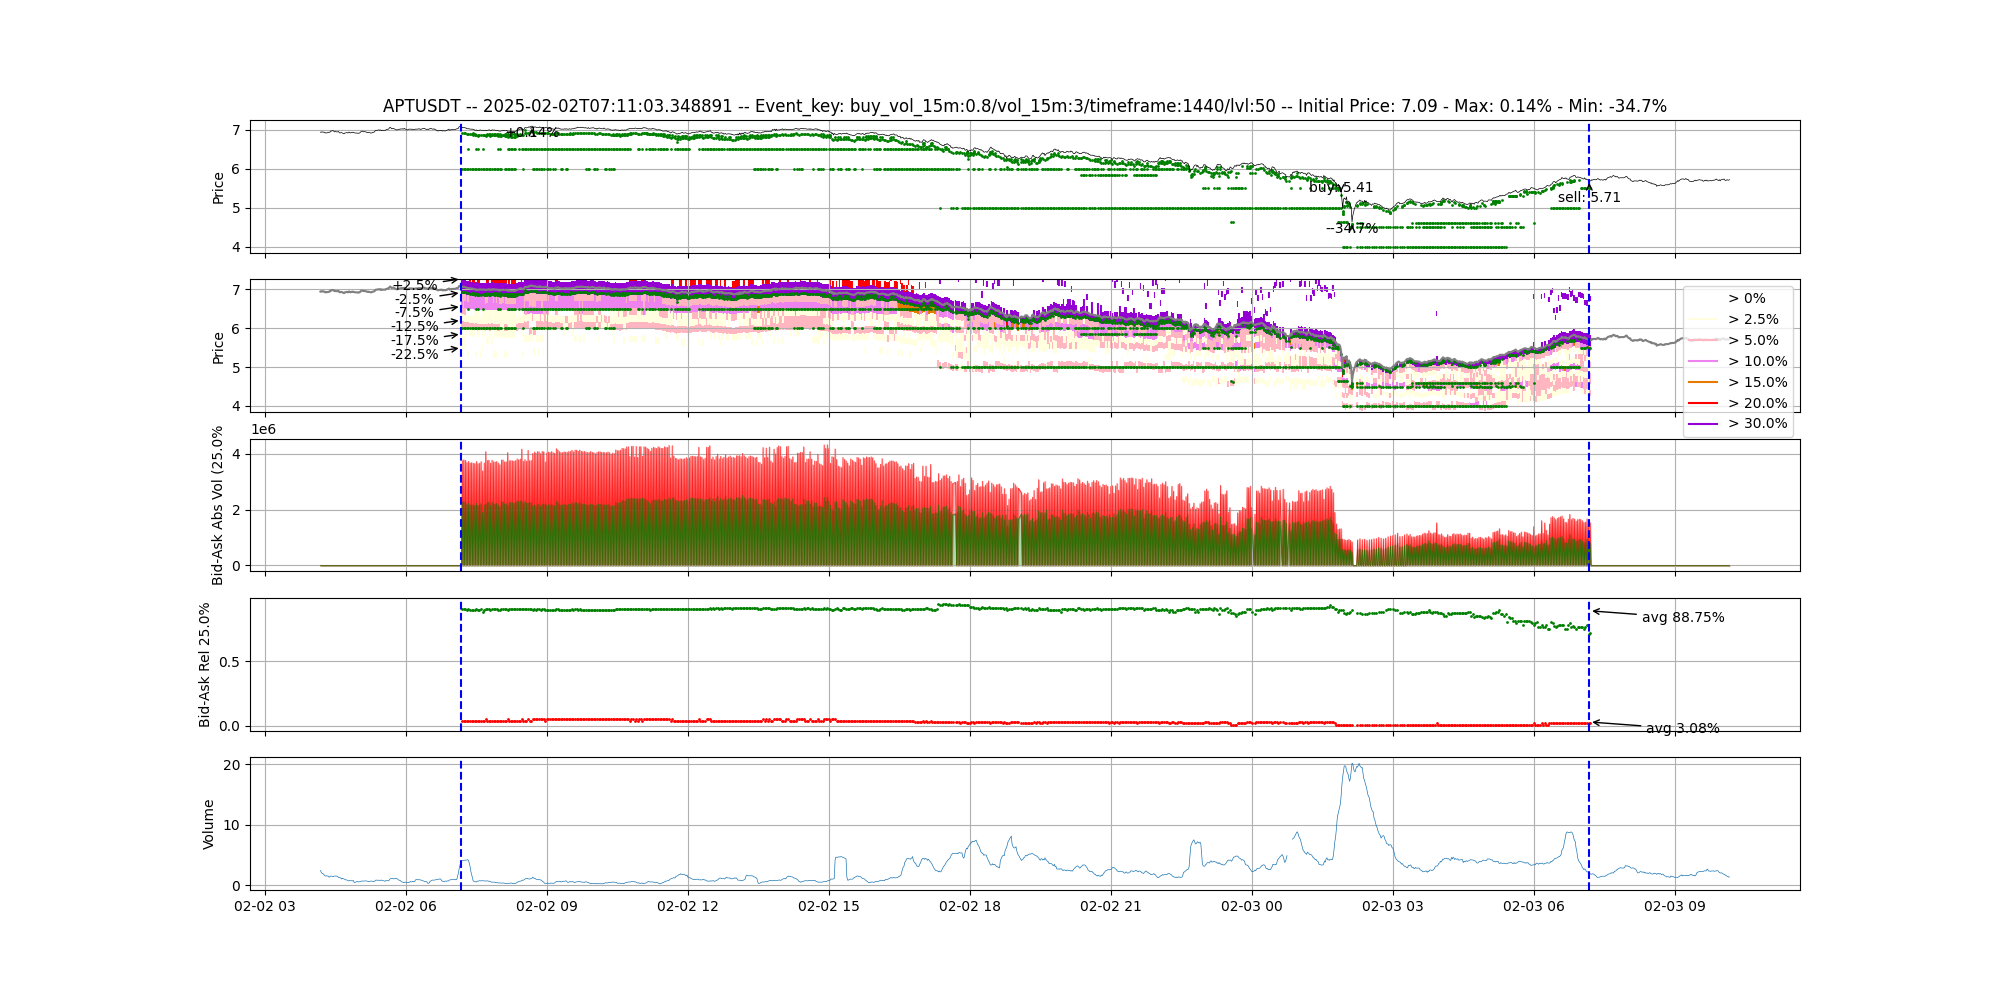

FTTUSDT 2025-02-03T02:04:02.300597 25.87 buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl:250
Initial Price: 1.6605 - drop_from_max: -24.64%
buy: 2025-02-03T02:52:00 - 1.51. sell: 2025-02-04T02:04:00 - 1.9007
[{'ask': {'0.025': 0.0, '0.05': 0.0, '0.075': 0.0, '0.1': 0.0, '0.125': 1.0, '0.15': 0.0, '0.175': 0.0, '0.2': 0.0, '0.225': 0.0, '0.25': 0.0}, 'bid_level': 0.54, 'ask_level': 0.01, 'total_bid_volume': 558719, 'total_ask_volume': 28497506, 'dt': '2025-02-03T02:52'}]


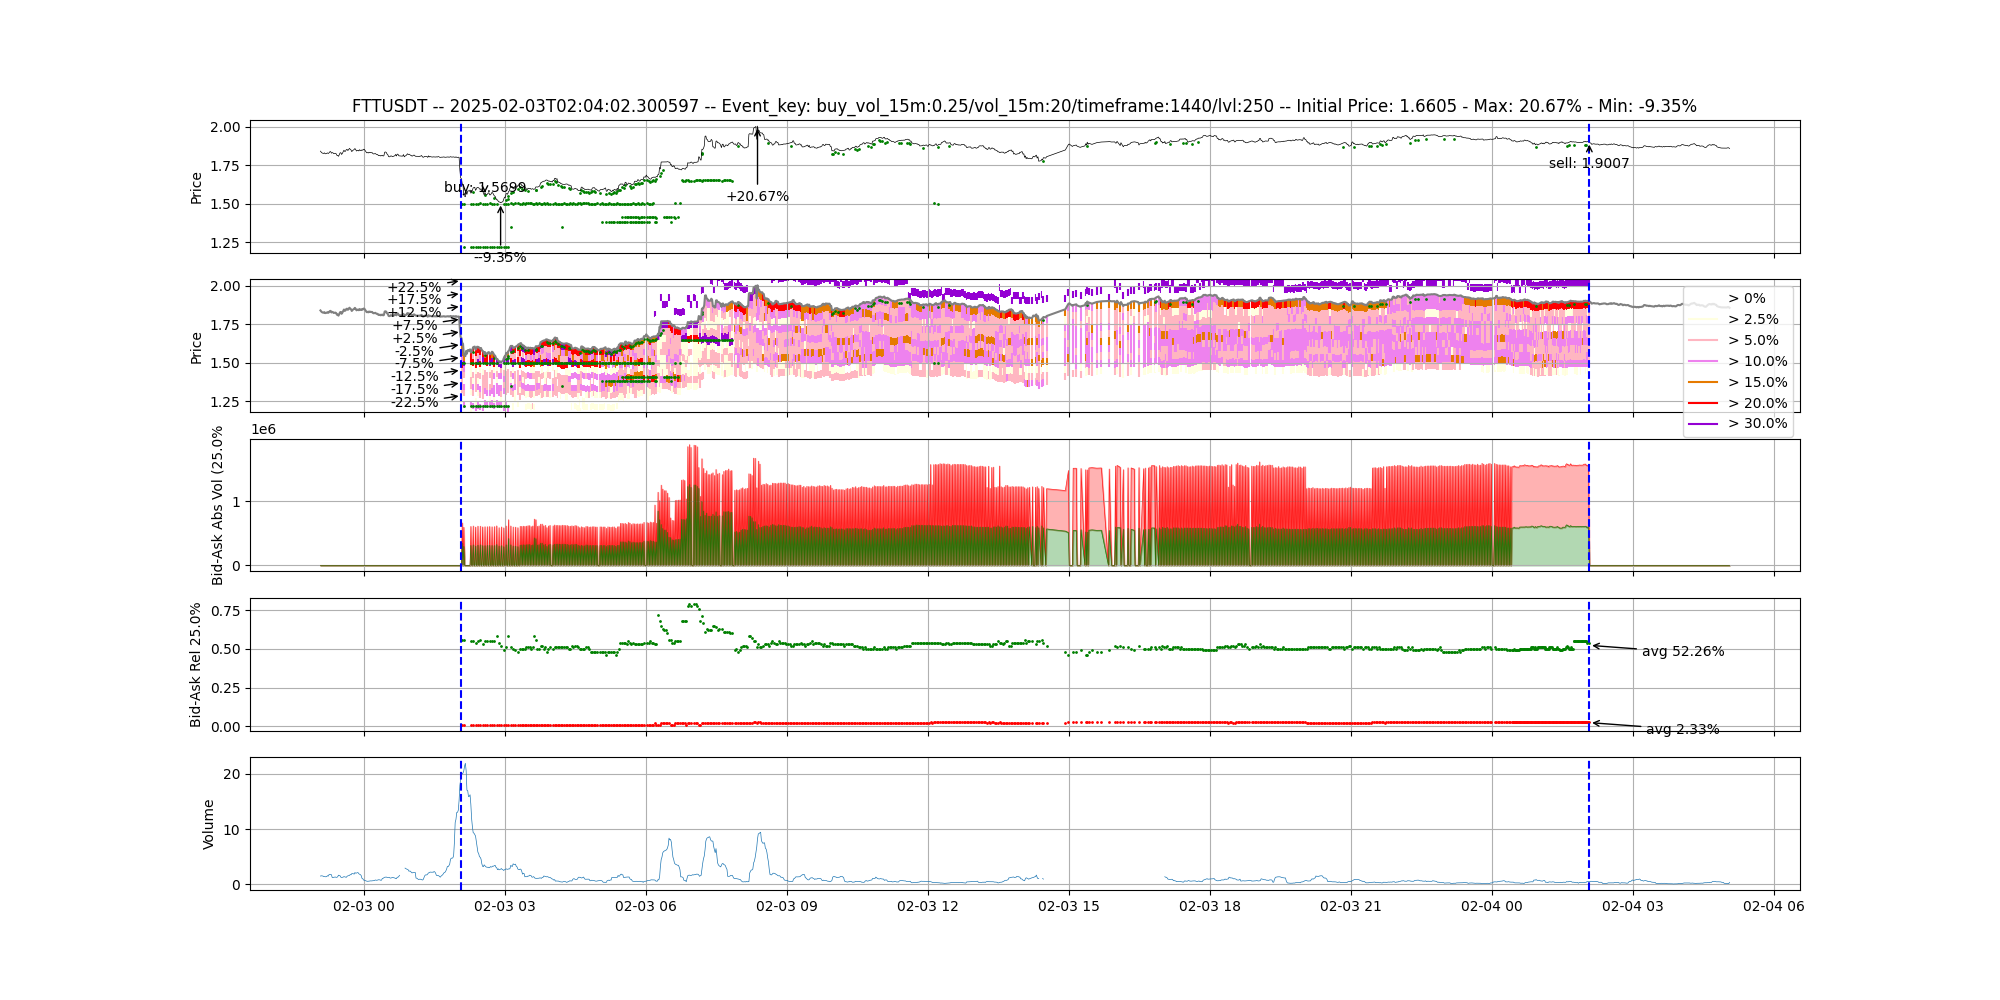

FTTUSDT 2025-02-03T01:56:02.295378 26.09 buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150
Initial Price: 1.8 - drop_from_max: -24.88%
buy: 2025-02-03T02:55:00 - 1.5053. sell: 2025-02-04T01:56:00 - 1.8981
[{'ask': {'0.025': 0.0, '0.05': 0.0, '0.075': 0.0, '0.1': 0.0, '0.125': 1.0, '0.15': 0.0, '0.175': 0.0, '0.2': 0.0, '0.225': 0.0, '0.25': 0.0}, 'bid_level': 0.51, 'ask_level': 0.01, 'total_bid_volume': 583282, 'total_ask_volume': 29047138, 'dt': '2025-02-03T02:55'}]


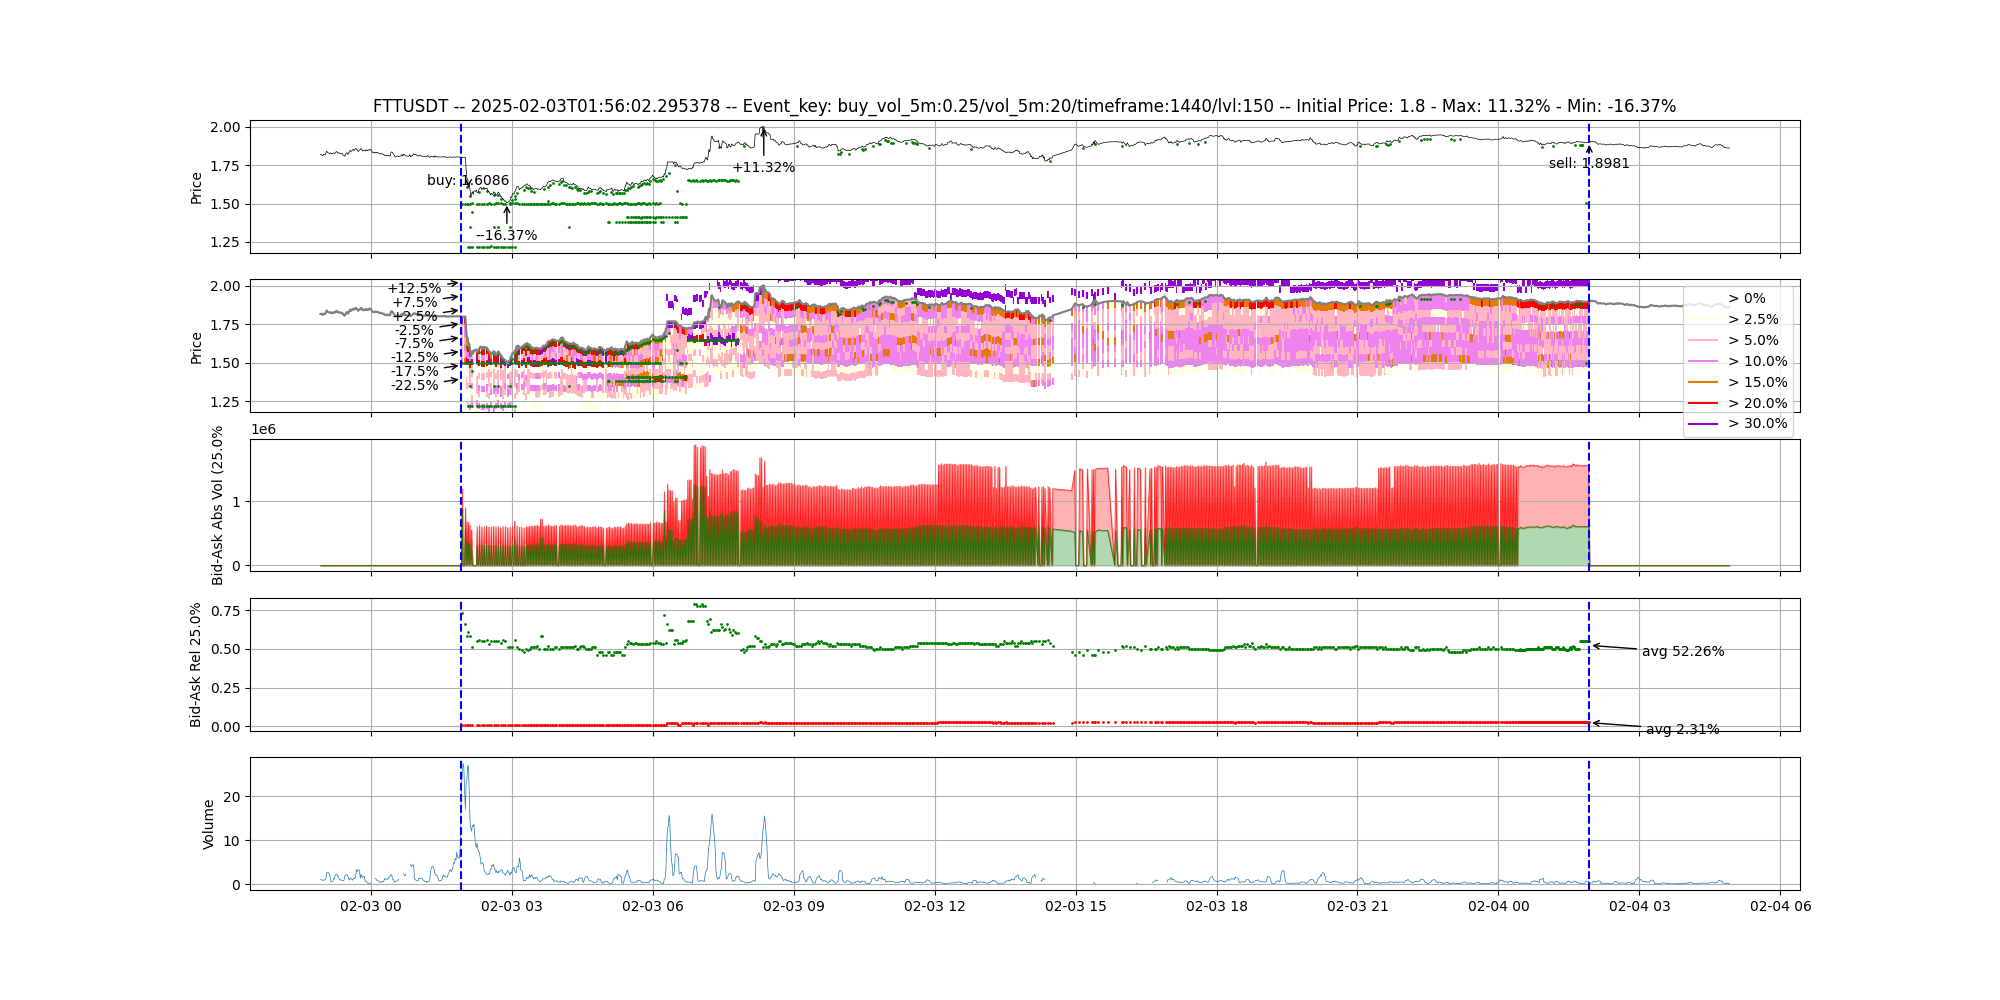

PEPEUSDT 2025-02-02T20:19:05.481180 16.7 buy_vol_1m:0.85/vol_1m:10/timeframe:1440/lvl:10
Initial Price: 1.114e-05 - drop_from_max: -19.39%
buy: 2025-02-03T02:04:00 - 8.98e-06. sell: 2025-02-03T20:19:00 - 1.048e-05
[{'ask': {'0.025': 0.0, '0.05': 0.5, '0.075': 0.0, '0.1': 0.0, '0.125': 0.0, '0.15': 0.5, '0.175': 0.0, '0.2': 0.0, '0.225': 0.0, '0.25': 0.0}, 'bid_level': 0.76, 'ask_level': 0.02, 'total_bid_volume': 4435156, 'total_ask_volume': 108646531, 'dt': '2025-02-03T02:04'}]


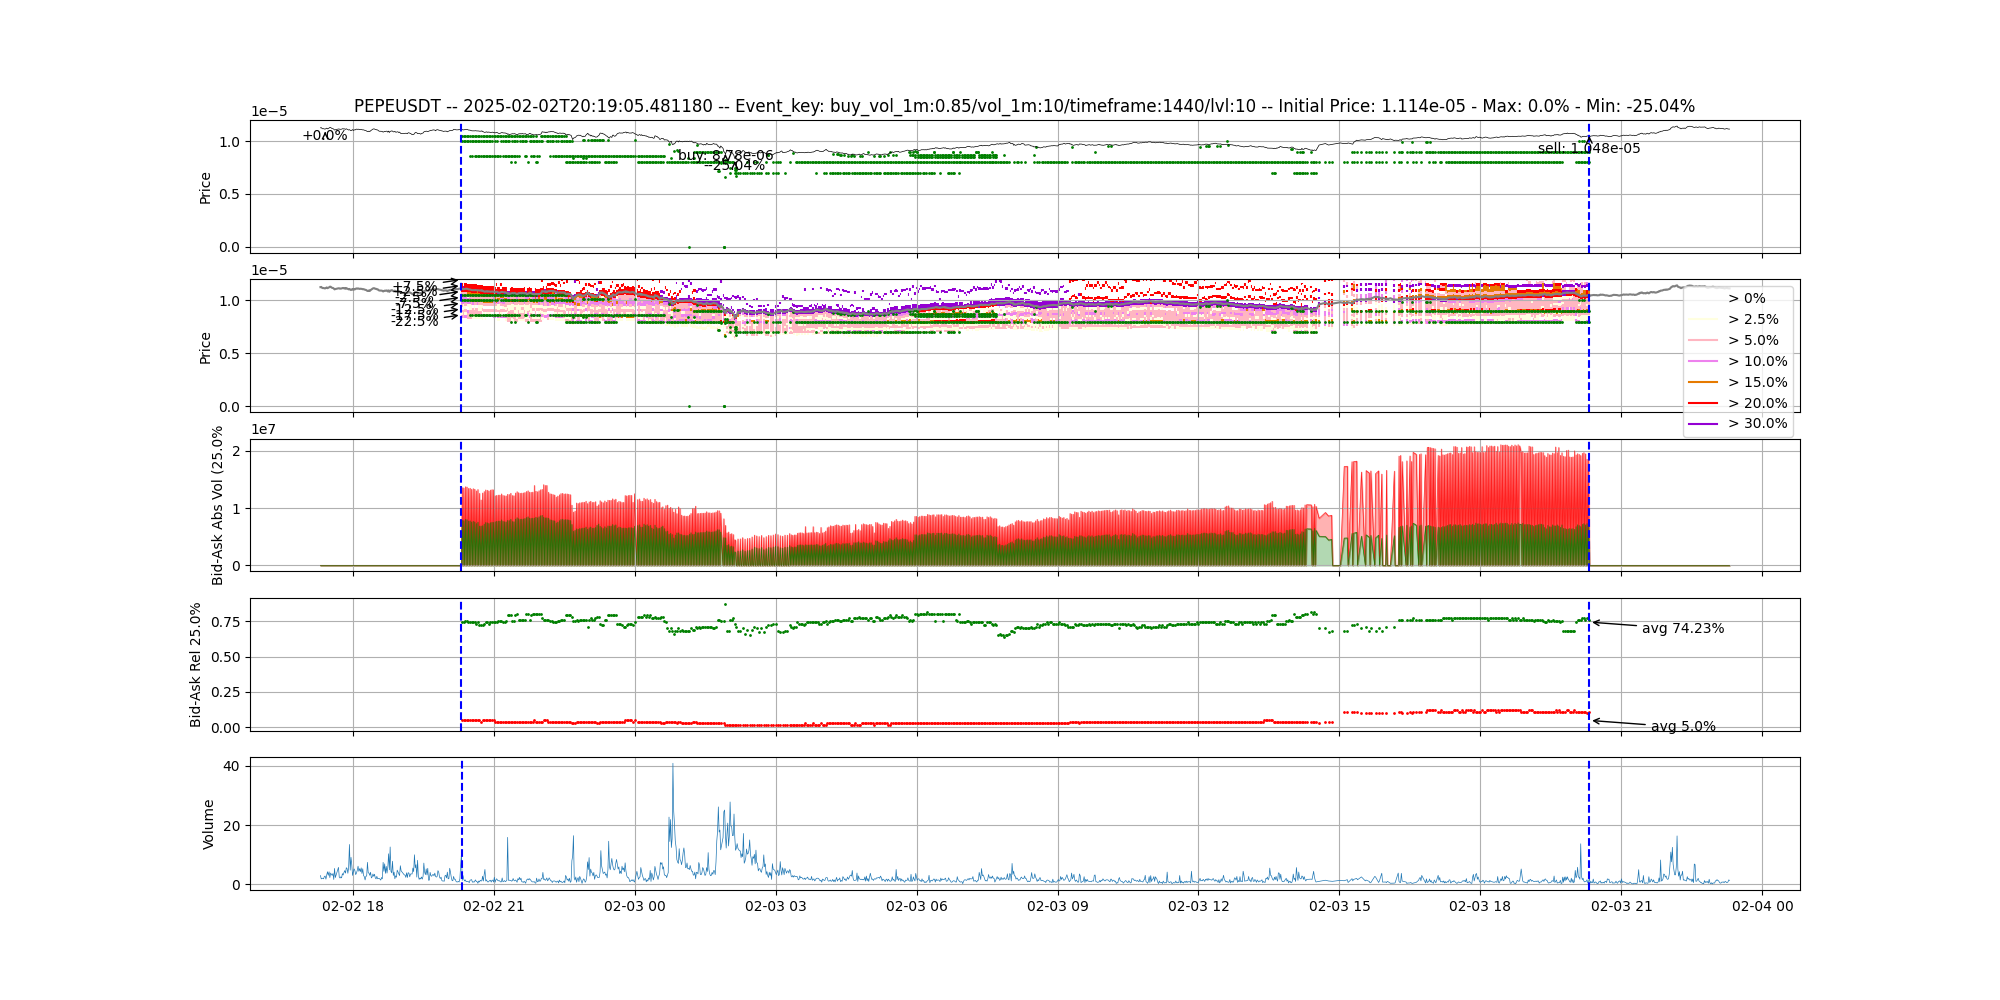

FTTUSDT 2025-02-03T01:56:02.295378 25.43 buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150
Initial Price: 1.8 - drop_from_max: -24.48%
buy: 2025-02-03T02:52:00 - 1.5133. sell: 2025-02-04T01:56:00 - 1.8981
[{'ask': {'0.025': 0.0, '0.05': 0.0, '0.075': 0.0, '0.1': 0.0, '0.125': 1.0, '0.15': 0.0, '0.175': 0.0, '0.2': 0.0, '0.225': 0.0, '0.25': 0.0}, 'bid_level': 0.55, 'ask_level': 0.01, 'total_bid_volume': 574294, 'total_ask_volume': 29044467, 'dt': '2025-02-03T02:52'}]


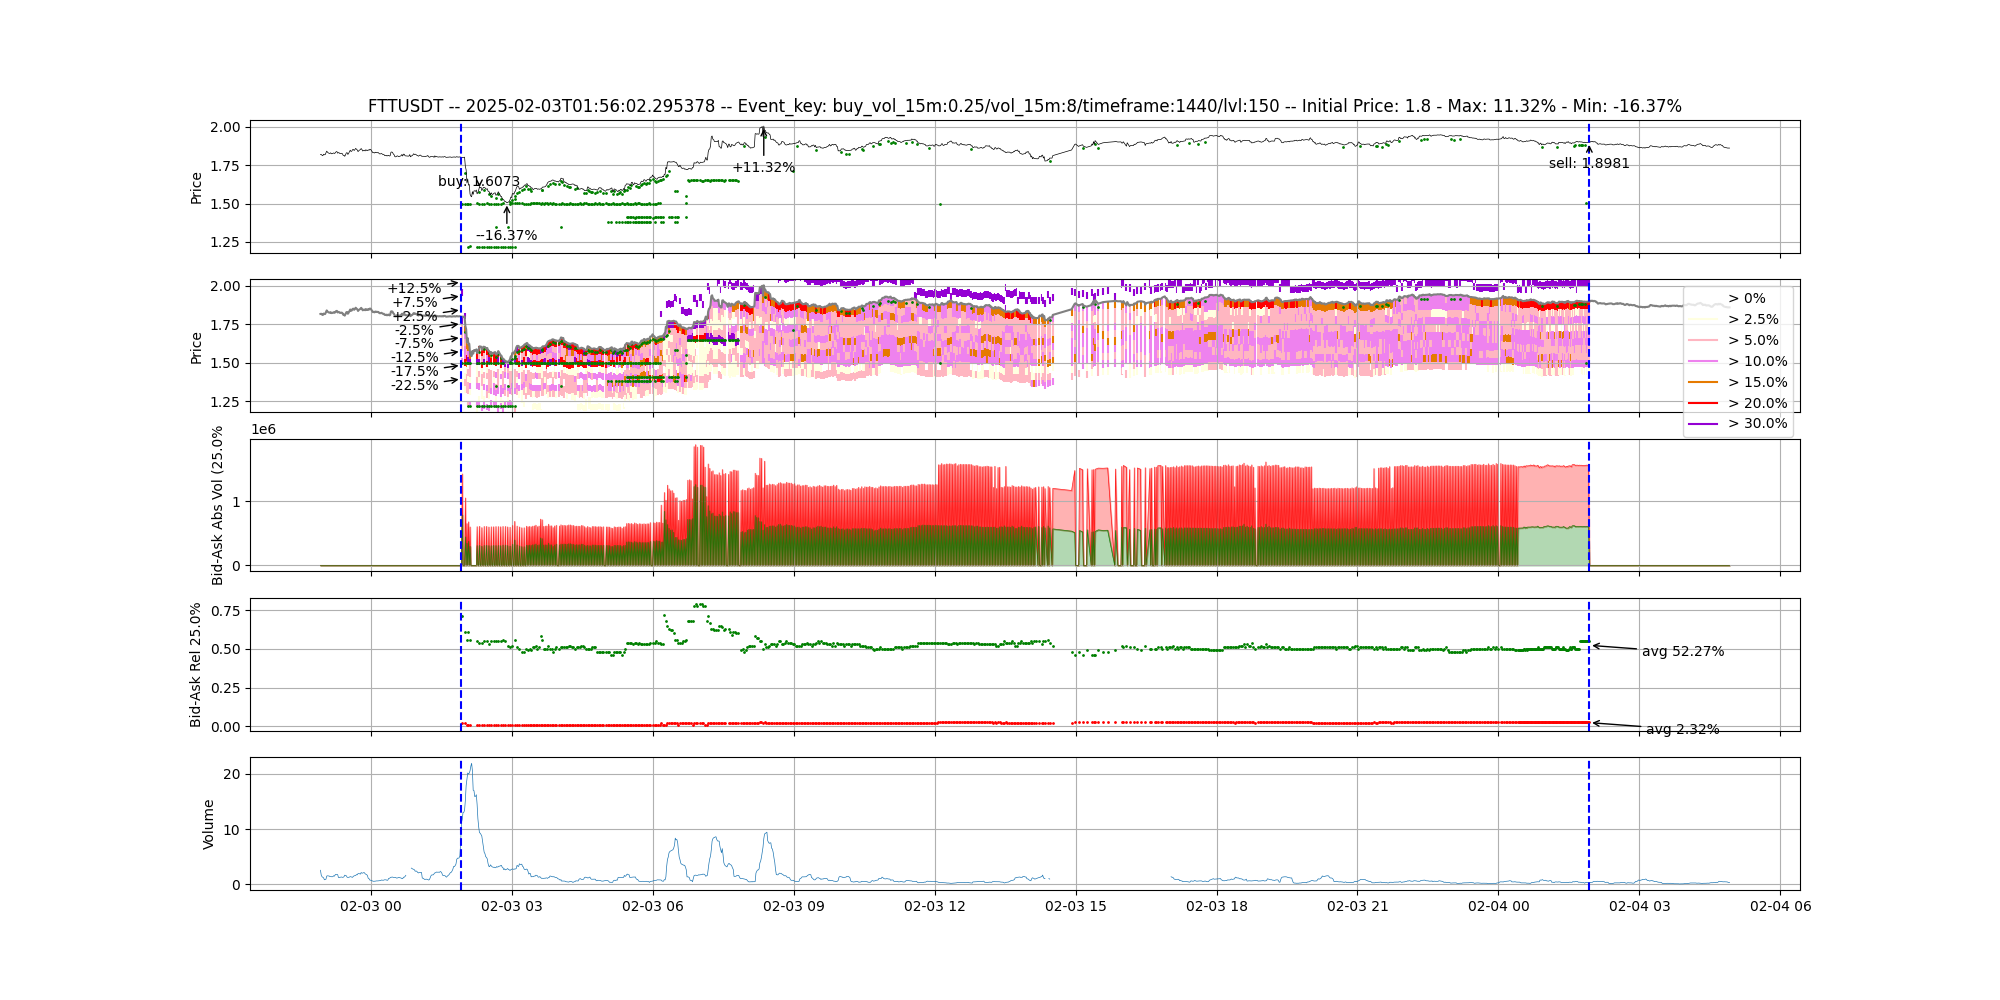

DOTUSDT 2025-02-02T22:32:02.321755 15.71 buy_vol_1m:0.15/vol_1m:20/timeframe:1440/lvl:50
Initial Price: 5.087 - drop_from_max: -13.84%
buy: 2025-02-03T14:27:00 - 4.545. sell: 2025-02-03T22:32:00 - 5.259
[{'ask': {'0.025': 0.077, '0.05': 0.077, '0.075': 0.077, '0.1': 0.231, '0.125': 0.0, '0.15': 0.077, '0.175': 0.077, '0.2': 0.154, '0.225': 0.154, '0.25': 0.077}, 'bid_level': 0.86, 'ask_level': 0.13, 'total_bid_volume': 3343179, 'total_ask_volume': 10115768, 'dt': '2025-02-03T14:27'}]


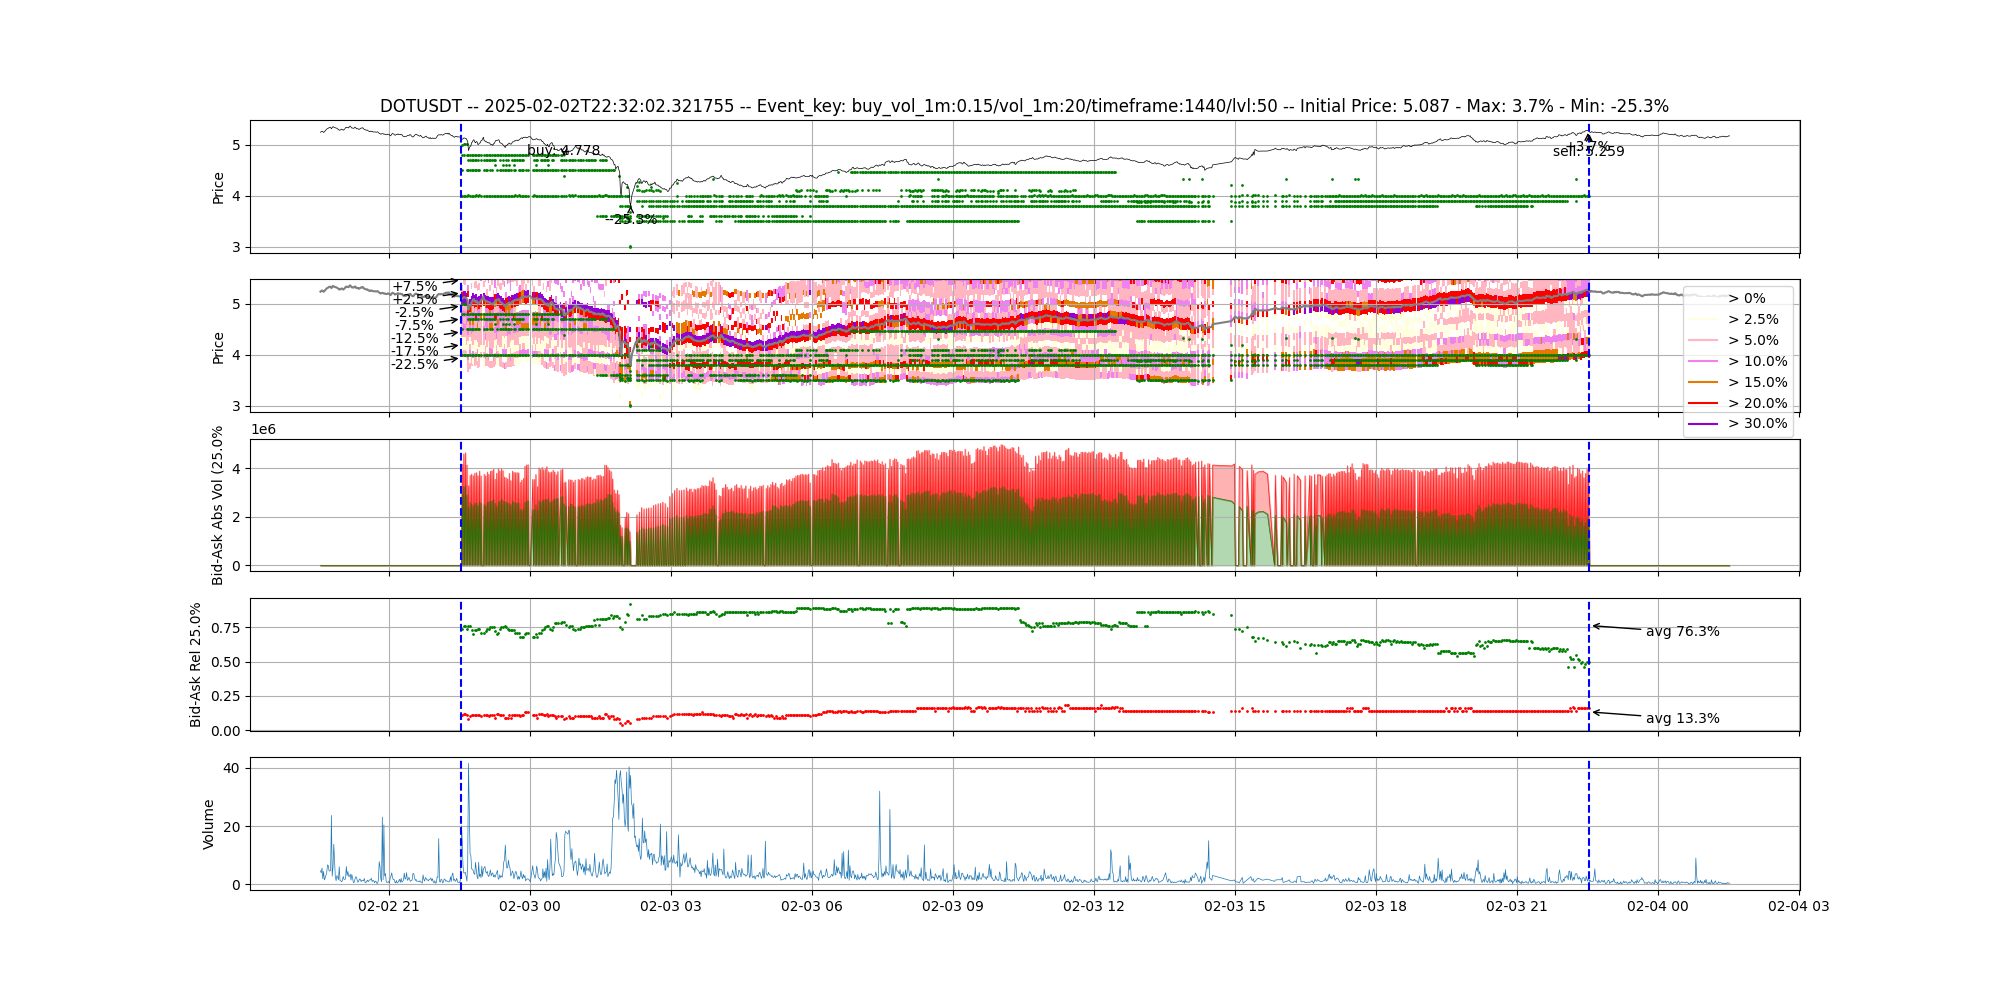

JUPUSDT 2025-02-02T17:21:06.671127 23.36 buy_vol_1m:0.15/vol_1m:20/timeframe:1440/lvl:50
Initial Price: 0.9489 - drop_from_max: -22.0%
buy: 2025-02-03T02:08:00 - 0.7509. sell: 2025-02-03T17:21:00 - 0.9263
[{'ask': {'0.025': 0.0, '0.05': 0.0, '0.075': 0.5, '0.1': 0.0, '0.125': 0.0, '0.15': 0.0, '0.175': 0.0, '0.2': 0.0, '0.225': 0.5, '0.25': 0.0}, 'bid_level': 0.93, 'ask_level': 0.02, 'total_bid_volume': 4334343, 'total_ask_volume': 15134058, 'dt': '2025-02-03T02:08'}]


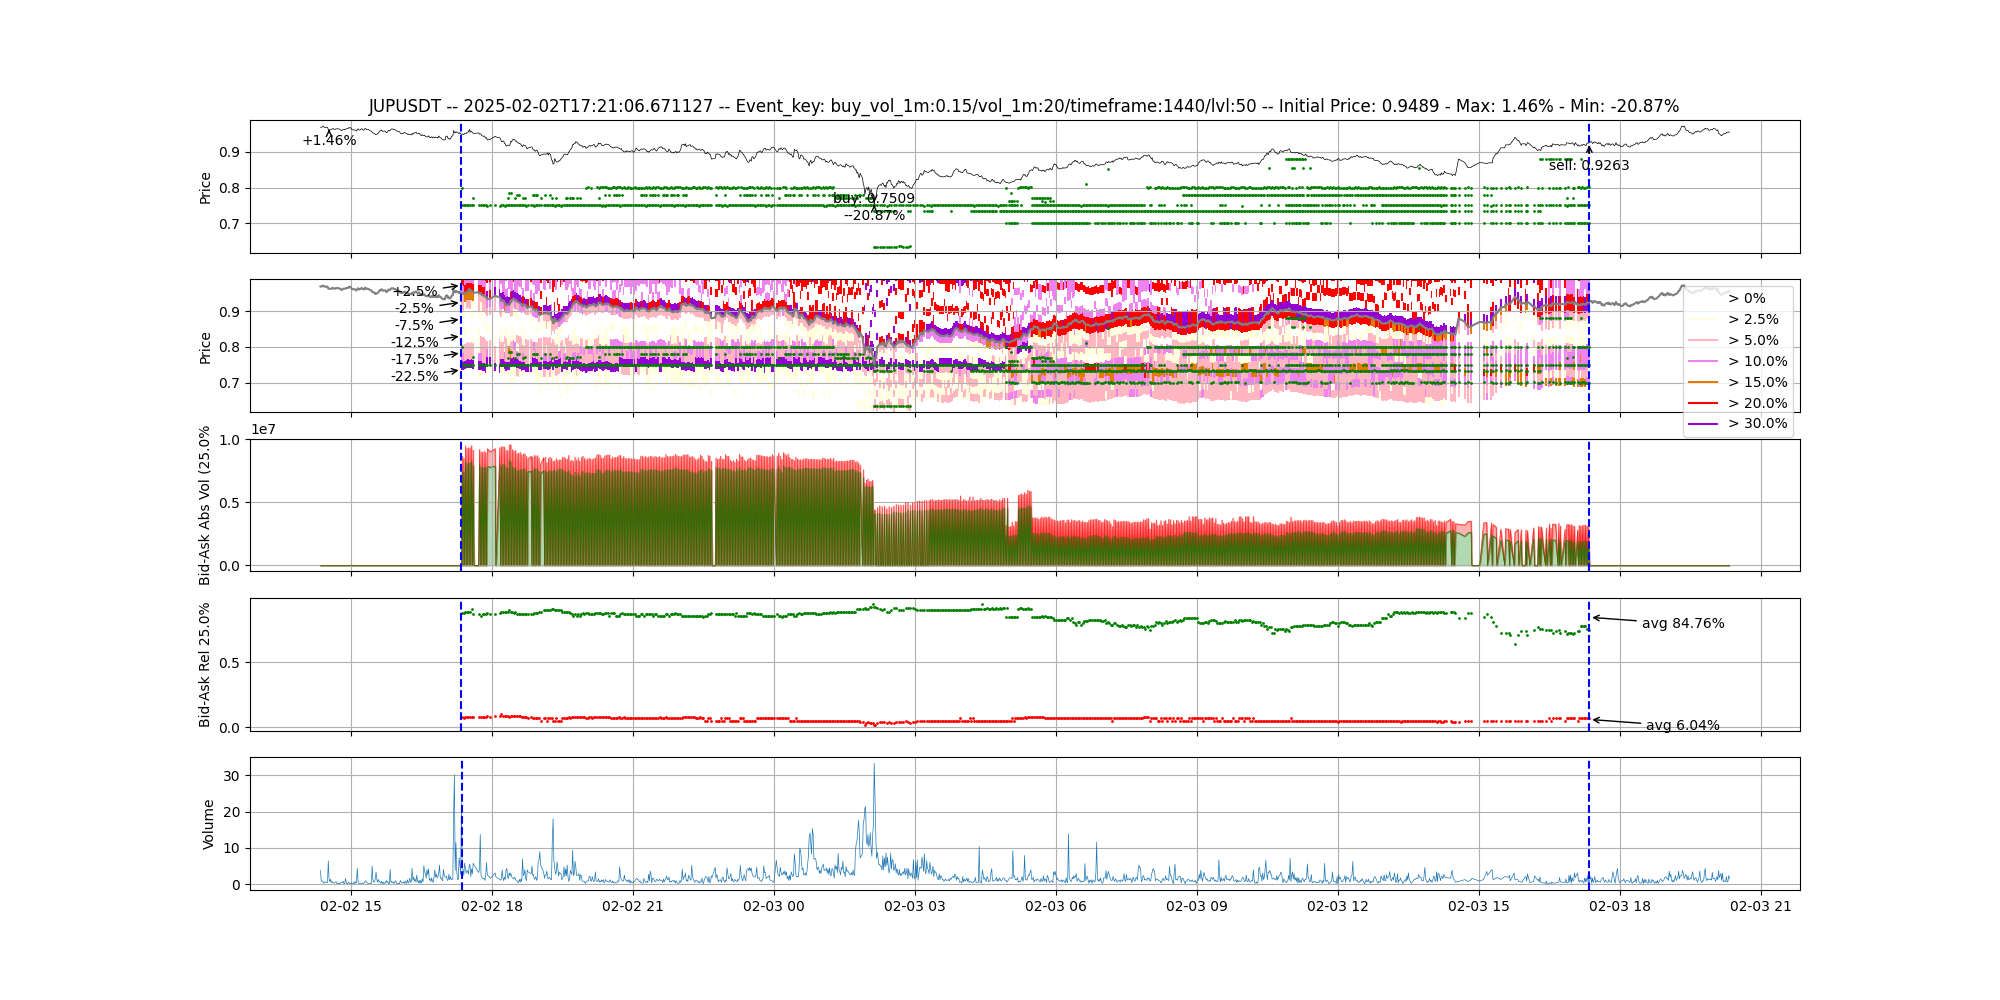

ALGOUSDT 2025-02-03T00:17:06.054529 26.07 buy_vol_1m:0.15/vol_1m:20/timeframe:1440/lvl:50
Initial Price: 0.2909 - drop_from_max: -21.5%
buy: 2025-02-03T01:54:00 - 0.2501. sell: 2025-02-04T00:17:00 - 0.3153
[{'ask': {'0.025': 0.0, '0.05': 0.333, '0.075': 0.333, '0.1': 0.0, '0.125': 0.0, '0.15': 0.0, '0.175': 0.0, '0.2': 0.0, '0.225': 0.0, '0.25': 0.333}, 'bid_level': 0.65, 'ask_level': 0.03, 'total_bid_volume': 544699, 'total_ask_volume': 12043245, 'dt': '2025-02-03T01:54'}]


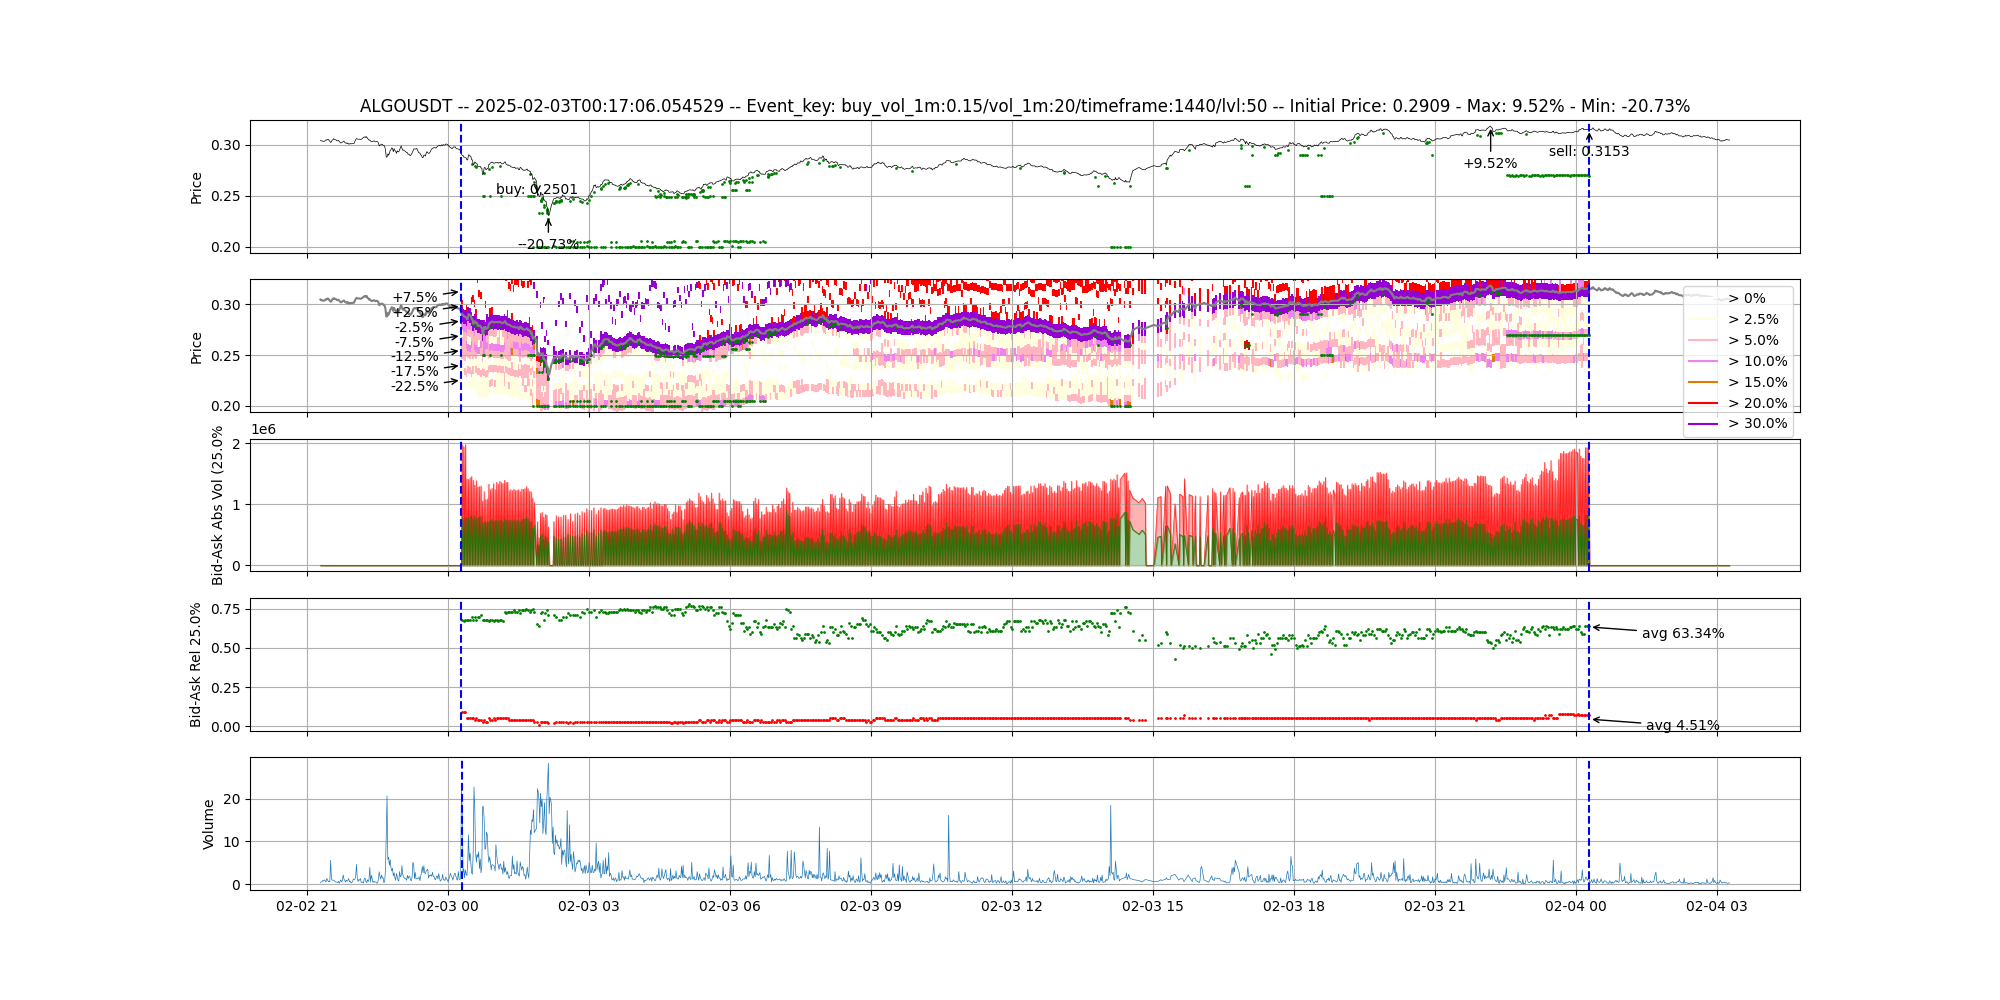

SHIBUSDT 2025-02-02T11:49:07.613652 12.3 buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50
Initial Price: 1.701e-05 - drop_from_max: -25.02%
buy: 2025-02-03T01:57:00 - 1.301e-05. sell: 2025-02-03T11:49:00 - 1.461e-05
[{'ask': {'0.025': 0.0, '0.05': 0.0, '0.075': 1.0, '0.1': 0.0, '0.125': 0.0, '0.15': 0.0, '0.175': 0.0, '0.2': 0.0, '0.225': 0.0, '0.25': 0.0}, 'bid_level': 0.66, 'ask_level': 0.01, 'total_bid_volume': 1973297, 'total_ask_volume': 69818014, 'dt': '2025-02-03T01:57'}]


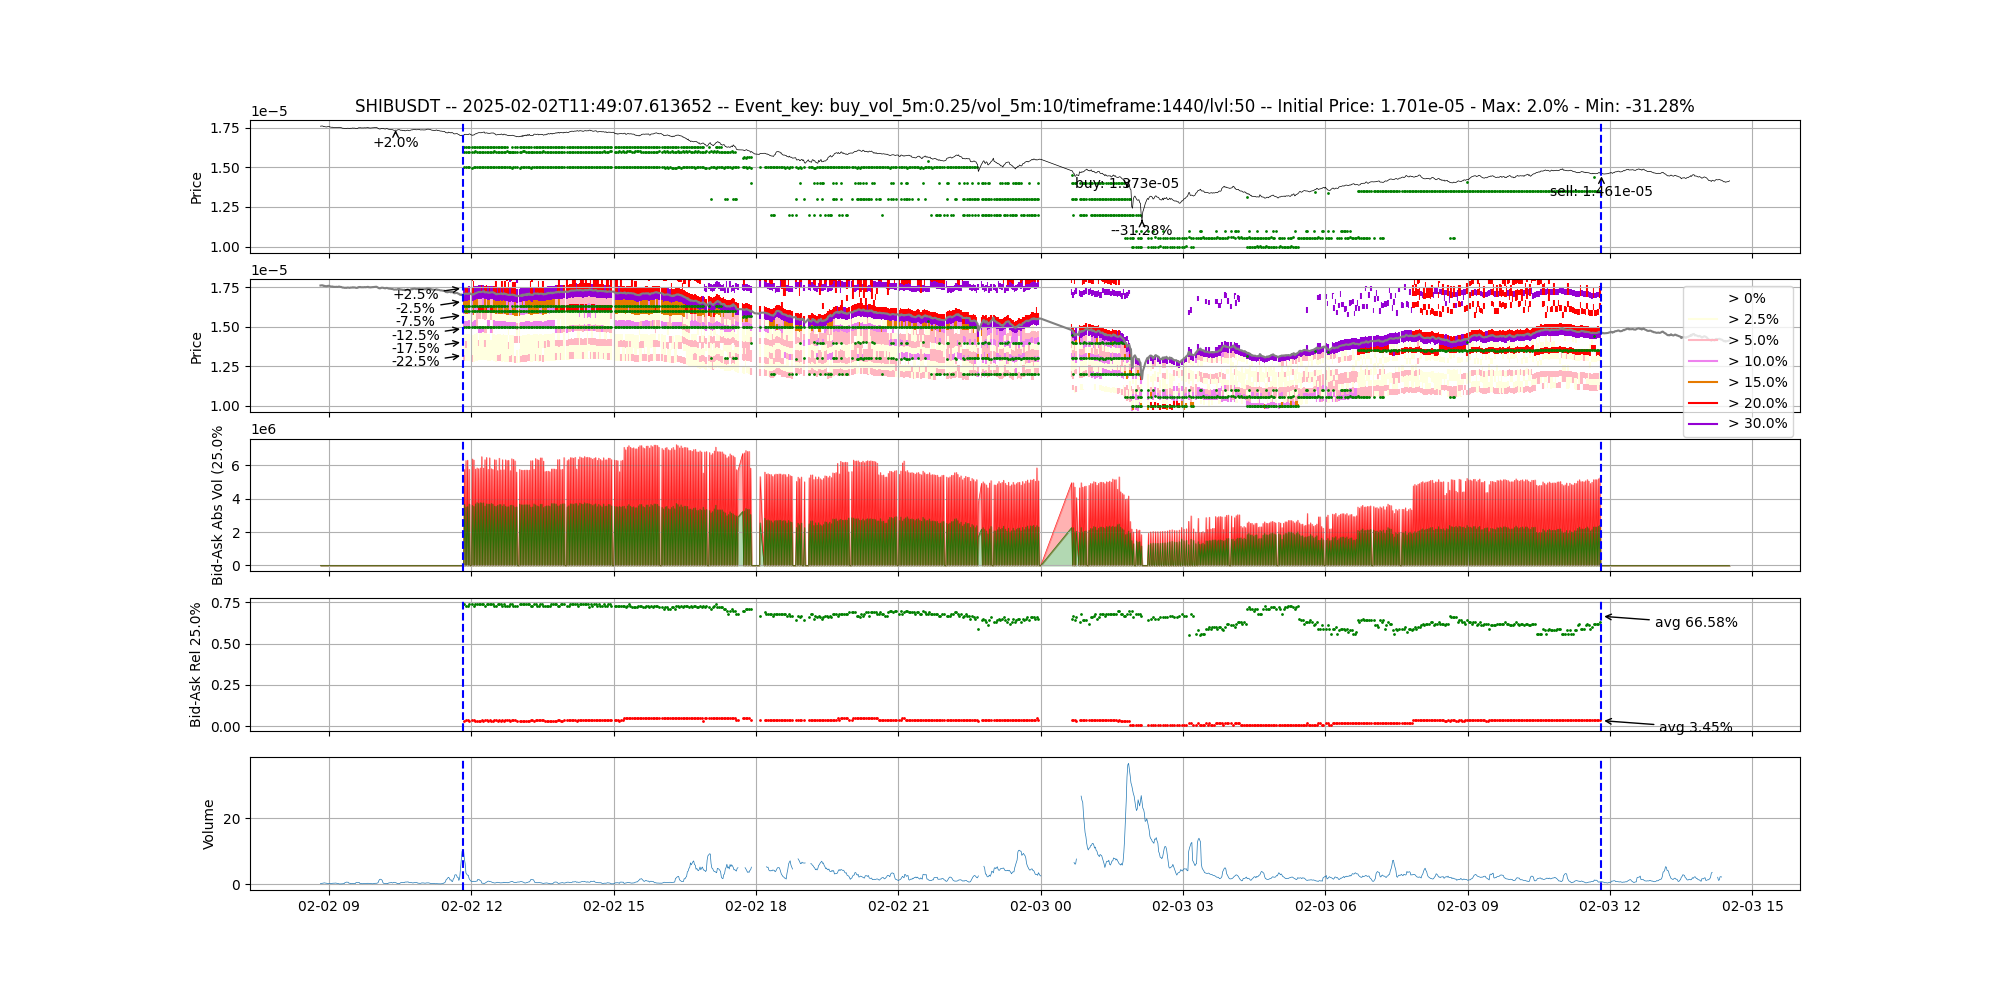

GALAUSDT 2025-02-02T21:55:08.104553 30.18 buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50
Initial Price: 0.02405 - drop_from_max: -23.71%
buy: 2025-02-03T01:56:00 - 0.01882. sell: 2025-02-03T21:55:00 - 0.0245
[{'ask': {'0.025': 0.0, '0.05': 0.0, '0.075': 0.0, '0.1': 1.0, '0.125': 0.0, '0.15': 0.0, '0.175': 0.0, '0.2': 0.0, '0.225': 0.0, '0.25': 0.0}, 'bid_level': 0.75, 'ask_level': 0.01, 'total_bid_volume': 496968, 'total_ask_volume': 11265881, 'dt': '2025-02-03T01:56'}]


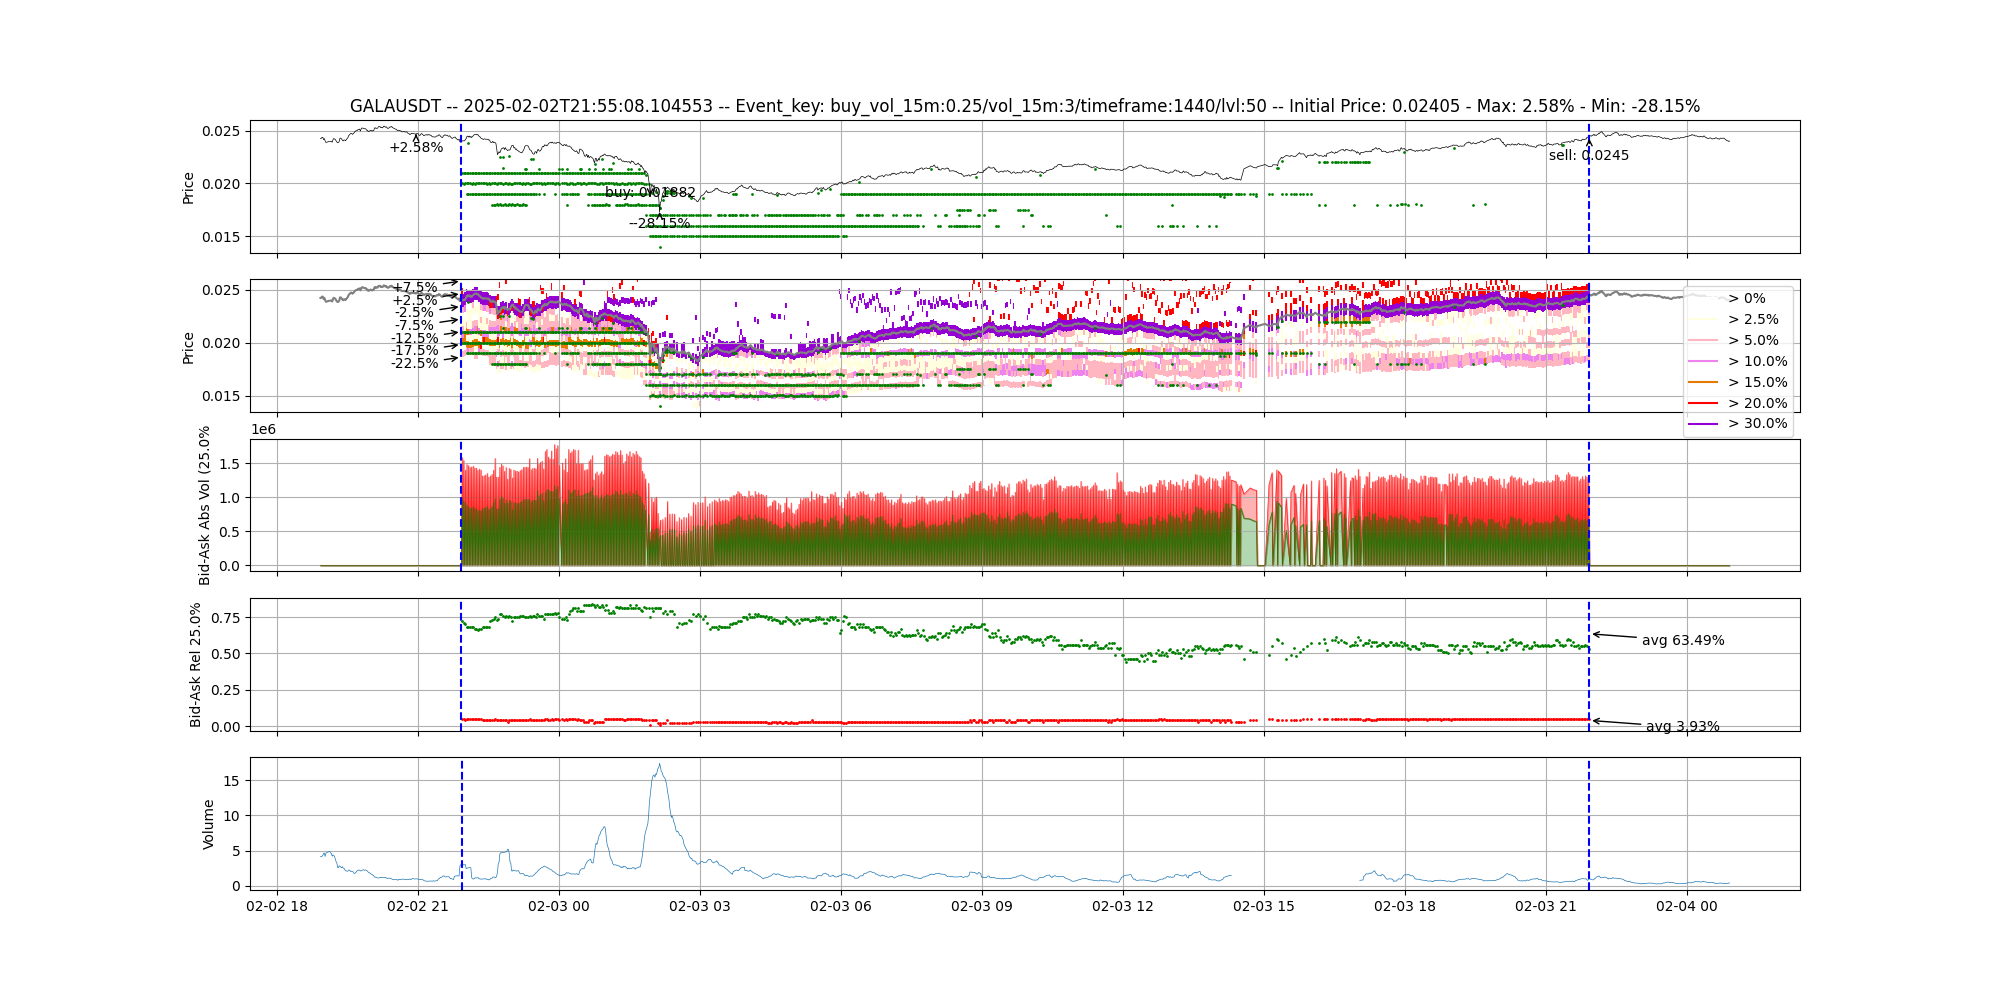

CRVUSDT 2025-02-02T10:14:05.964031 22.19 buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50
Initial Price: 0.6529 - drop_from_max: -37.12%
buy: 2025-02-03T02:08:00 - 0.411. sell: 2025-02-03T10:14:00 - 0.5022
[{'ask': {'0.025': 0.0, '0.05': 0.0, '0.075': 0.5, '0.1': 0.0, '0.125': 0.0, '0.15': 0.0, '0.175': 0.5, '0.2': 0.0, '0.225': 0.0, '0.25': 0.0}, 'bid_level': 0.79, 'ask_level': 0.02, 'total_bid_volume': 992117, 'total_ask_volume': 11966623, 'dt': '2025-02-03T02:08'}]


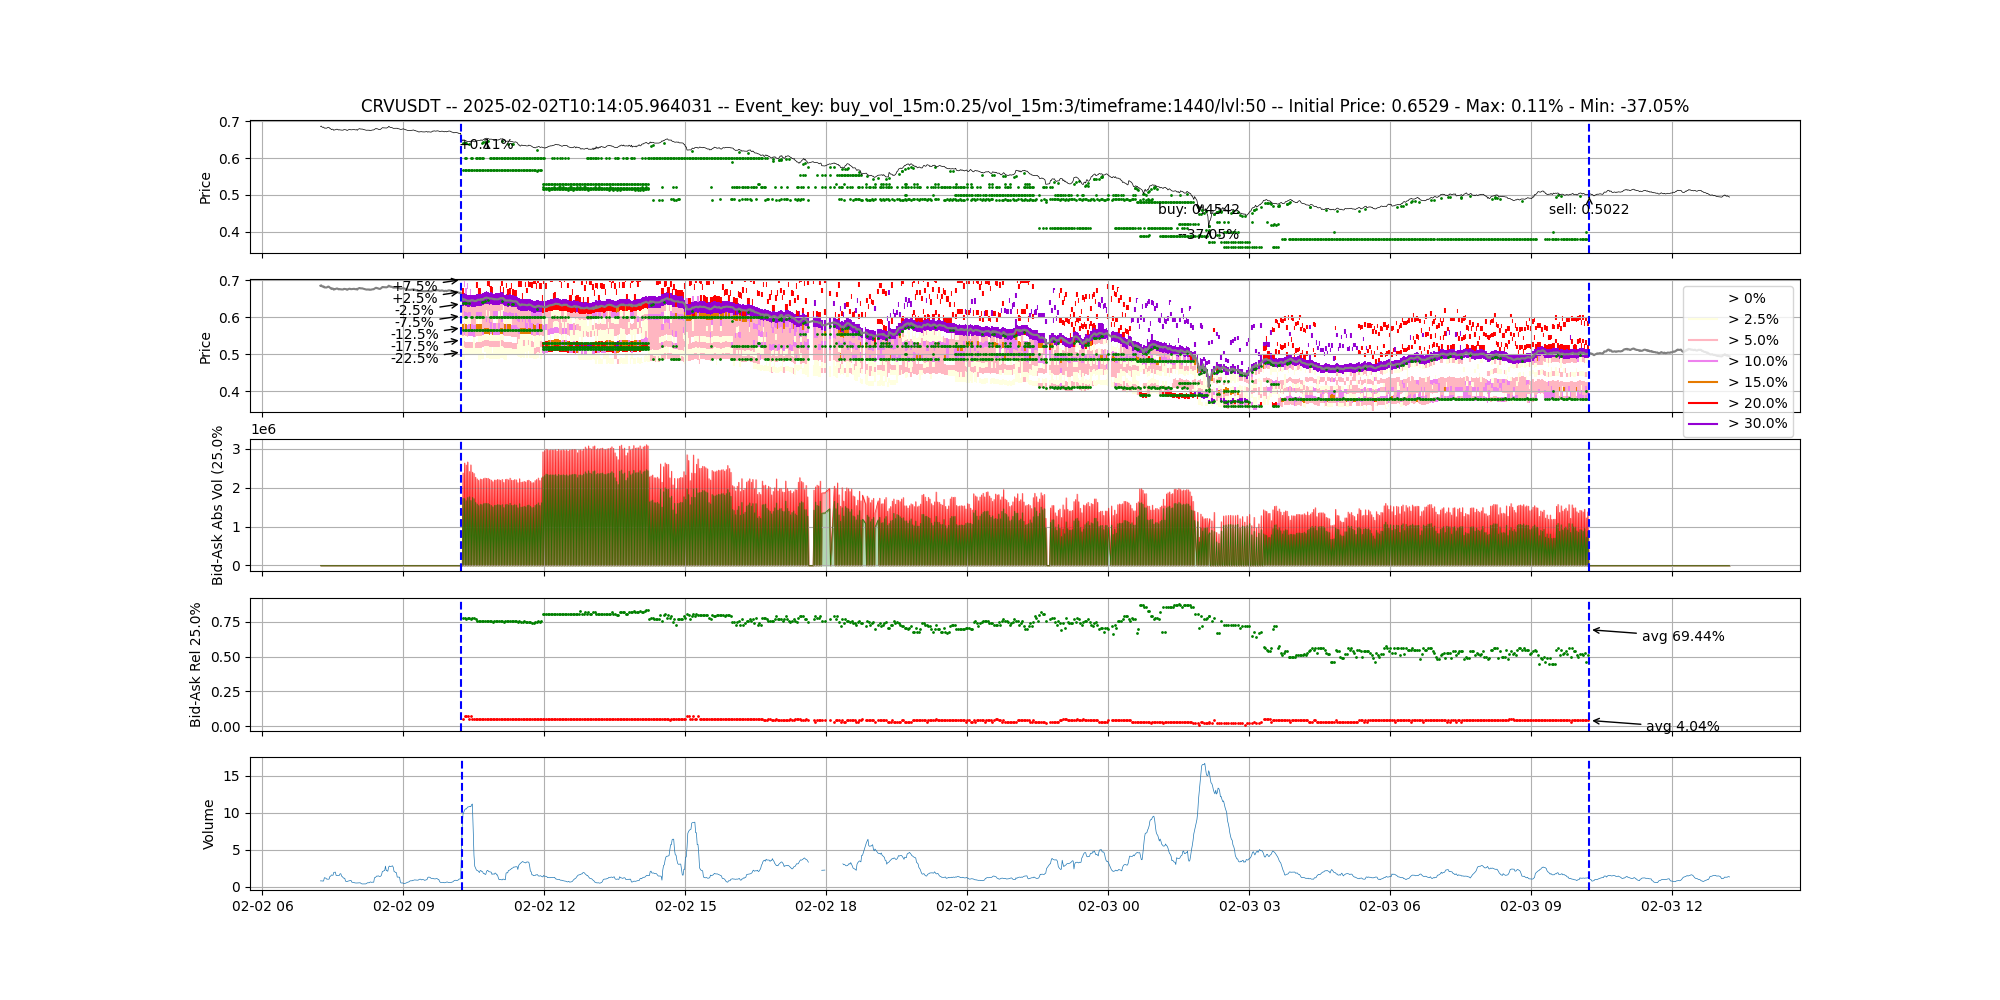

12 events whose gain is between 10.0% and 100%


In [8]:
from Helpers import get_plots
from IPython.display import Image, display
left_gain = 0.1
right_gain = 1
buy_events=True
paths_png = get_plots(left_gain, right_gain, buy_events)


In [1]:
from Helpers import get_top_crypto

response, list_datetime = get_top_crypto()
response

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


svolume standings is up to date, loading then..
2 days, 8:36:25.921318
Data Download from 2025-02-20T00:00:00 + 7days


{'top_10': [978.9154919268416,
  1000.4284728941459,
  1071.8710721199786,
  1054.139022975565,
  1101.181568904946,
  1101.1134065479537,
  1025.4704133143812,
  1026.7592619292354,
  1051.1427386924406,
  1033.2581385692404,
  1026.7584948736271,
  1018.6115610006483,
  1020.7421681447895,
  982.1900053085421,
  971.3064500939727,
  934.3001070972031,
  953.0080263436411,
  986.5996423248123,
  984.1598337341695,
  926.8628838026373,
  852.5496265246531,
  885.2854594666247,
  841.3013244591812,
  819.8433726950392,
  792.3390748444988,
  787.445658474528,
  807.3130187974089,
  802.4744150718851,
  816.6346516866047,
  813.5429866935841,
  838.1552348337016,
  831.1677393251776,
  877.8845770995786,
  857.6859733007693,
  845.6564643465437,
  832.9974218405135,
  804.5499314047745,
  821.7748618368819],
 'top_50': [954.6646067463495,
  996.1703264786461,
  1086.2304942471221,
  1073.013354967049,
  1141.3217240438569,
  1053.6745713338644,
  948.8557889250093,
  948.2530312694203,
 